**Table of Contents**

* [Importing Necessary Libraries](#chapter1)
* [Load Datasets](#chapter2)
* [Exploratory Data Analysis](#chapter3)
* [Data Preprocessing](#chapter4)
* [Feature Selection](#chapter5)
* [Model Implementation](#chapter6)
* [Model Evaluation](#chapter7)
* [Model Comparison Report](#chapter8)
* [Challenges Faced Report](#chapter9)
* [Conclusion](#chapter10)


### Importing Necessary Libraries

In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Load Data

In [100]:
df=pd.read_csv(' Assignment - 2 - Training dataset.csv')

In [101]:
df

,date,company name,spend,impressions,likecount,commentcount,repostcount,total engagements,conversion,action,type,posturl,postcontent,profileurl,videourl,sharedposturl,created_at,size,url,number of faces,face emotion,face position,face area percentage %,objects,number of objects,primary object,primary object position,primary object area percentage %,secondary object,secondary object position,secondary object area percentage %,text,text length,dominant colour,cta,logos,logo 1 name,logo 1 position,logo 1 area percentage %,logo 2 name,logo 2 position,logo 2 area percentage %,number of persons,person area %,person area,style,tone,voice,sentiment,text area %,empty space %,topic,language,# faces,# persons,# objects,# text length
0,2023-09-05,schneider-electric,5.85,479,31,0,2,33,7,Post,Document,https://www.linkedin.com/feed/update/urn:li:ac...,Join us to Understand the basics of harmonics ...,https://www.linkedin.com/company/schneider-ele...,NaN,NaN,2023-09-13 9:46:04,100x100,NaN,0,NaN,NaN,0.000000,NaN,0,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,0,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,0,NaN,0.000000,NaN,Informative,Professional,Positive,0.00,> 40%,Offerings,English,0,0,0,NaN
1,2023-09-01,schneider-electric,1.80,3880,224,1,9,234,0,Post,Image,https://www.linkedin.com/feed/update/urn:li:ac...,"When challenges arise, Schneider Electric Exch...",https://www.linkedin.com/company/schneider-ele...,NaN,NaN,2023-09-13 9:46:04,800x420,https://rocketium.com/images/cran/prod/assets/...,0,NaN,NaN,0.000000,Building,1,Building,center,57.181154,NaN,NaN,0.000000,Life Is On Schneider|Electric|controlsee,37,darkslategray,NaN,Schneider Electric,Schneider Electric,bottom-left,0.714286,NaN,NaN,0.000000,0,small,0.000000,NaN,NaN,NaN,NaN,1.85,> 40%,Offerings,English,0,0,1,40 to 60
2,2023-09-04,schneider-electric,2.32,785,55,1,16,72,11,Post,Video (LinkedIn Source),https://www.linkedin.com/feed/update/urn:li:ac...,Join our webinar on September 19th at 4 PM HKT...,https://www.linkedin.com/company/schneider-ele...,NaN,https://www.linkedin.com/video/event/urn:li:ug...,2023-09-13 9:46:04,100x100,NaN,0,NaN,NaN,0.000000,NaN,0,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,0,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,0,NaN,0.000000,NaN,Informative,Professional,Positive,0.00,> 40%,Sustainability,English,0,0,0,NaN
3,2023-09-04,schneider-electric,3.94,658,54,1,5,60,8,Post,Video (LinkedIn Source),https://www.linkedin.com/feed/update/urn:li:ac...,Join our webinar on September 19th at 5 PM CET...,https://www.linkedin.com/company/schneider-ele...,NaN,https://www.linkedin.com/video/event/urn:li:ug...,2023-09-13 9:46:04,100x100,NaN,0,NaN,NaN,0.000000,NaN,0,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,0,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,0,NaN,0.000000,NaN,NaN,NaN,NaN,0.00,> 40%,Sustainability,English,0,0,0,NaN
4,2023-09-04,schneider-electric,3.89,2568,168,1,5,174,25,Post,Video (LinkedIn Source),https://www.linkedin.com/feed/update/urn:li:ac...,More than 80% of partners have made investment...,https://www.linkedin.com/company/schneider-ele...,https://dms.licdn.com/playlist/vid/D4D10AQGDxy...,NaN,2023-09-13 9:46:04,1200x630,https://rocketium.com/images/cran/prod/assets/...,2,Joy,top-center,4.381481,"Glasses, Person, Person, Tie, Person, Glasses",6,Person,center,54.487621,Person,center,30.206522,Life Is On Schneiderte,21,darkslategray,NaN,"Schneider Electric, Schneider Electric",Schneider Electric,bottom-left,0.761905,Schneider Electric,bottom-left,0.414683,3,large,125.009998,NaN,NaN,NaN,NaN,1.05,10% to 20%,Sustainability,English,2 to 4,2 to 4,5 or more,20 to 40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,2023-08-04,rockwell-automation,0.89,536,34,1,1,36,1,Post,Video (LinkedIn Source),https://www.linkedin.com/feed/update/urn:li:ac...,What happens when a U.S. marine transporter ga...,https

### Domain Analysis
* In the domain analysis of Digital Market Analysis, a comprehensive analysis involves studying various factors to develop accurate predictive models. 
 * This includes examining different types of content and engagement to understand audience interaction and post effectiveness, monitoring current market trends, and considering variables such as tone, voice, and sentiment.
* Additionally, post content, language, brand reputation, company name, Visual appeal  play significant roles in Digital Marketing. 

* By analyzing these factors collectively, analysts can build predictive models that aid companies in making content, increase their performance ,audience engagement, visual appeal, and effectiveness of posts within a specific domain.

### Basic Checks

In [102]:
df.conversion.unique()

array([  7,   0,  11,   8,  25,  14,   2,   5,   9,   6,  15,  41,   4,
        29,  10,  44,   1,  51, 106,  19,  49,  12,  76,  23, 113,  35,
         3,  34,  53,  47,  59,  54,  37,  40, 115,  26,  57, 297,  85,
        39, 108,  24,  28,  55,  18,  16,  58,  48,  30, 154,  33, 138,
        32,  60,  38,  17,  56,  81,  95,  65, 259,  63,  21, 226,  61,
       132,  36, 398,  68,  27,  20, 153, 147,  22, 157, 118, 216,  45,
        31, 102,  69,  88, 120,  52,  74,  97,  70,  50,  73, 119,  13,
       245, 167, 152, 555,  83,  72,  67, 321, 136, 124,  46,  84,  79,
       142, 112,  78, 169, 146, 104,  91,  42, 303,  66, 185, 101,  71,
        43, 410,  64, 219, 123,  62, 161, 144, 234, 100,  92, 247, 280,
       133, 150, 171, 262, 168, 211, 209,  86, 438, 125, 117, 196,  80,
       206, 327, 553, 179,  77,  89,  75,  90, 204, 105, 243, 137, 409,
       278, 431, 589, 158, 205, 156, 177, 264], dtype=int64)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 57 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   date                                1054 non-null   object 
 1   company name                        1054 non-null   object 
 2   spend                               1054 non-null   float64
 3   impressions                         1054 non-null   int64  
 4   likecount                           1054 non-null   int64  
 5   commentcount                        1054 non-null   int64  
 6   repostcount                         1054 non-null   int64  
 7   total engagements                   1054 non-null   int64  
 8   conversion                          1054 non-null   int64  
 9   action                              1054 non-null   object 
 10  type                                1054 non-null   object 
 11  posturl                             1054 no

In [104]:
df.describe()

,spend,impressions,likecount,commentcount,repostcount,total engagements,conversion,number of faces,face area percentage %,number of objects,primary object area percentage %,secondary object area percentage %,text length,logo 1 area percentage %,logo 2 area percentage %,number of persons,person area,text area %
count,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000
mean,213.192998,15075.879507,197.481973,2.911765,11.707780,212.101518,34.914611,0.777989,0.644928,1.817837,12.695187,4.379151,68.045541,1.214036,0.117452,0.861480,13.327576,7.204507
std,1253.414372,67763.338279,343.418407,8.764124,19.993921,360.599591,61.291577,1.899180,1.900660,2.688484,22.180729,11.035399,182.270990,6.813438,1.089433,1.910578,25.736842,19.542672
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.615000,803.750000,33.000000,0.000000,1.000000,34.250000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,23.645000,2577.000000,98.500000,0.000000,5.000000,110.000000,13.500000,0.000000,0.000000,1.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.475000
75%,87.315000,7612.250000,220.000000,2.000000,14.000000,241.000000,39.750000,1.000000,0.000000,3.000000,18.135837,2.490360,101.750000,0.780377,0.000000,1.000000,18.333088,9.200000
max,23039.110000,961453.000000,6130.000000,111.000000,193.000000,6291.000000,589.000000,10.000000,26.340476,10.000000,99.149411,92.711892,3669.000000,75.250000,30.739978,10.000000,161.275964,366.900000


In [105]:
df.describe(include="O")

,date,company name,action,type,posturl,postcontent,profileurl,videourl,sharedposturl,created_at,size,url,face emotion,face position,objects,primary object,primary object position,secondary object,secondary object position,text,dominant colour,cta,logos,logo 1 name,logo 1 position,logo 2 name,logo 2 position,person area %,style,tone,voice,sentiment,empty space %,topic,language,# faces,# persons,# objects,# text length
count,1054,1054,1054,1054,1054,1054,1054,221,244,1054,1054,971,294,294,529,529,529,385,385,608,697,135,359,359,359,47,47,529,232,338,319,340,1054,1054,1054,1054,1054,1054,608
unique,42,8,3,7,654,650,8,144,169,42,87,971,1,9,275,59,9,57,9,445,54,48,40,25,9,12,7,3,2,2,2,2,4,10,6,4,4,4,4
top,2023-09-06,rockwell-automation,Post,Image,https://www.linkedin.com/feed/update/urn:li:ac...,MESA Smart Manufacturing Now! Virtual EventMES...,https://www.linkedin.com/company/rockwell-auto...,https://dms.licdn.com/playlist/vid/D4D10AQGDxy...,https://www.ge.com/sustainability,2023-09-13 9:46:04,100x100,https://rocketium.com/images/cran/prod/assets/...,Joy,top-right,Building,Person,center,Person,center,Solve Issues|Faster with|TechConnect|KNOW MORE...,darkslategray,CLICK NOW TO READ,Rockwell Automation,Rockwell Automation,top-left,Schneider Electric,bottom-left,small,Modern,Informative,Friendly,Positive,> 40%,Offerings,English,0,0,0,> 60
freq,48,322,1048,559,2,4,322,2,3,50,354,1,294,60,30,298,175,160,76,8,198,20,115,118,100,22,19,238,231,315,173,317,880,364,1038,760,732,525,402


In [106]:
pd.set_option('display.max_columns',None)

In [107]:
df

,date,company name,spend,impressions,likecount,commentcount,repostcount,total engagements,conversion,action,type,posturl,postcontent,profileurl,videourl,sharedposturl,created_at,size,url,number of faces,face emotion,face position,face area percentage %,objects,number of objects,primary object,primary object position,primary object area percentage %,secondary object,secondary object position,secondary object area percentage %,text,text length,dominant colour,cta,logos,logo 1 name,logo 1 position,logo 1 area percentage %,logo 2 name,logo 2 position,logo 2 area percentage %,number of persons,person area %,person area,style,tone,voice,sentiment,text area %,empty space %,topic,language,# faces,# persons,# objects,# text length
0,2023-09-05,schneider-electric,5.85,479,31,0,2,33,7,Post,Document,https://www.linkedin.com/feed/update/urn:li:ac...,Join us to Understand the basics of harmonics ...,https://www.linkedin.com/company/schneider-ele...,NaN,NaN,2023-09-13 9:46:04,100x100,NaN,0,NaN,NaN,0.000000,NaN,0,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,0,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,0,NaN,0.000000,NaN,Informative,Professional,Positive,0.00,> 40%,Offerings,English,0,0,0,NaN
1,2023-09-01,schneider-electric,1.80,3880,224,1,9,234,0,Post,Image,https://www.linkedin.com/feed/update/urn:li:ac...,"When challenges arise, Schneider Electric Exch...",https://www.linkedin.com/company/schneider-ele...,NaN,NaN,2023-09-13 9:46:04,800x420,https://rocketium.com/images/cran/prod/assets/...,0,NaN,NaN,0.000000,Building,1,Building,center,57.181154,NaN,NaN,0.000000,Life Is On Schneider|Electric|controlsee,37,darkslategray,NaN,Schneider Electric,Schneider Electric,bottom-left,0.714286,NaN,NaN,0.000000,0,small,0.000000,NaN,NaN,NaN,NaN,1.85,> 40%,Offerings,English,0,0,1,40 to 60
2,2023-09-04,schneider-electric,2.32,785,55,1,16,72,11,Post,Video (LinkedIn Source),https://www.linkedin.com/feed/update/urn:li:ac...,Join our webinar on September 19th at 4 PM HKT...,https://www.linkedin.com/company/schneider-ele...,NaN,https://www.linkedin.com/video/event/urn:li:ug...,2023-09-13 9:46:04,100x100,NaN,0,NaN,NaN,0.000000,NaN,0,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,0,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,0,NaN,0.000000,NaN,Informative,Professional,Positive,0.00,> 40%,Sustainability,English,0,0,0,NaN
3,2023-09-04,schneider-electric,3.94,658,54,1,5,60,8,Post,Video (LinkedIn Source),https://www.linkedin.com/feed/update/urn:li:ac...,Join our webinar on September 19th at 5 PM CET...,https://www.linkedin.com/company/schneider-ele...,NaN,https://www.linkedin.com/video/event/urn:li:ug...,2023-09-13 9:46:04,100x100,NaN,0,NaN,NaN,0.000000,NaN,0,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,0,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,0,NaN,0.000000,NaN,NaN,NaN,NaN,0.00,> 40%,Sustainability,English,0,0,0,NaN
4,2023-09-04,schneider-electric,3.89,2568,168,1,5,174,25,Post,Video (LinkedIn Source),https://www.linkedin.com/feed/update/urn:li:ac...,More than 80% of partners have made investment...,https://www.linkedin.com/company/schneider-ele...,https://dms.licdn.com/playlist/vid/D4D10AQGDxy...,NaN,2023-09-13 9:46:04,1200x630,https://rocketium.com/images/cran/prod/assets/...,2,Joy,top-center,4.381481,"Glasses, Person, Person, Tie, Person, Glasses",6,Person,center,54.487621,Person,center,30.206522,Life Is On Schneiderte,21,darkslategray,NaN,"Schneider Electric, Schneider Electric",Schneider Electric,bottom-left,0.761905,Schneider Electric,bottom-left,0.414683,3,large,125.009998,NaN,NaN,NaN,NaN,1.05,10% to 20%,Sustainability,English,2 to 4,2 to 4,5 or more,20 to 40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,2023-08-04,rockwell-automation,0.89,536,34,1,1,36,1,Post,Video (LinkedIn Source),https://www.linkedin.com/feed/update/urn:li:ac...,What happens when a U.S. marine transporter ga...,https

### Check for Null Values

In [108]:
df.isnull().sum()

date                                     0
company name                             0
spend                                    0
impressions                              0
likecount                                0
commentcount                             0
repostcount                              0
total engagements                        0
conversion                               0
action                                   0
type                                     0
posturl                                  0
postcontent                              0
profileurl                               0
videourl                               833
sharedposturl                          810
created_at                               0
size                                     0
url                                     83
number of faces                          0
face emotion                           760
face position                          760
face area percentage %                   0
objects    

### Extract the features from the Date column

In [109]:
df['date'] = pd.to_datetime(df['date'])


In [110]:
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
#df['time']=pd.to_datetime(df["time"],format='%H:%M:%S:%f')
df['weekday'] = df['date'].dt.weekday
df['weekday_name'] = df['date'].dt.day_name()

In [111]:
df.head(5)

,date,company name,spend,impressions,likecount,commentcount,repostcount,total engagements,conversion,action,type,posturl,postcontent,profileurl,videourl,sharedposturl,created_at,size,url,number of faces,face emotion,face position,face area percentage %,objects,number of objects,primary object,primary object position,primary object area percentage %,secondary object,secondary object position,secondary object area percentage %,text,text length,dominant colour,cta,logos,logo 1 name,logo 1 position,logo 1 area percentage %,logo 2 name,logo 2 position,logo 2 area percentage %,number of persons,person area %,person area,style,tone,voice,sentiment,text area %,empty space %,topic,language,# faces,# persons,# objects,# text length,month,day,weekday,weekday_name
0,2023-09-05,schneider-electric,5.85,479,31,0,2,33,7,Post,Document,https://www.linkedin.com/feed/update/urn:li:ac...,Join us to Understand the basics of harmonics ...,https://www.linkedin.com/company/schneider-ele...,NaN,NaN,2023-09-13 9:46:04,100x100,NaN,0,NaN,NaN,0.000000,NaN,0,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,0,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,0,NaN,0.000000,NaN,Informative,Professional,Positive,0.00,> 40%,Offerings,English,0,0,0,NaN,9,5,1,Tuesday
1,2023-09-01,schneider-electric,1.80,3880,224,1,9,234,0,Post,Image,https://www.linkedin.com/feed/update/urn:li:ac...,"When challenges arise, Schneider Electric Exch...",https://www.linkedin.com/company/schneider-ele...,NaN,NaN,2023-09-13 9:46:04,800x420,https://rocketium.com/images/cran/prod/assets/...,0,NaN,NaN,0.000000,Building,1,Building,center,57.181154,NaN,NaN,0.000000,Life Is On Schneider|Electric|controlsee,37,darkslategray,NaN,Schneider Electric,Schneider Electric,bottom-left,0.714286,NaN,NaN,0.000000,0,small,0.000000,NaN,NaN,NaN,NaN,1.85,> 40%,Offerings,English,0,0,1,40 to 60,9,1,4,Friday
2,2023-09-04,schneider-electric,2.32,785,55,1,16,72,11,Post,Video (LinkedIn Source),https://www.linkedin.com/feed/update/urn:li:ac...,Join our webinar on September 19th at 4 PM HKT...,https://www.linkedin.com/company/schneider-ele...,NaN,https://www.linkedin.com/video/event/urn:li:ug...,2023-09-13 9:46:04,100x100,NaN,0,NaN,NaN,0.000000,NaN,0,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,0,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,0,NaN,0.000000,NaN,Informative,Professional,Positive,0.00,> 40%,Sustainability,English,0,0,0,NaN,9,4,0,Monday
3,2023-09-04,schneider-electric,3.94,658,54,1,5,60,8,Post,Video (LinkedIn Source),https://www.linkedin.com/feed/update/urn:li:ac...,Join our webinar on September 19th at 5 PM CET...,https://www.linkedin.com/company/schneider-ele...,NaN,https://www.linkedin.com/video/event/urn:li:ug...,2023-09-13 9:46:04,100x100,NaN,0,NaN,NaN,0.000000,NaN,0,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,0,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,0,NaN,0.000000,NaN,NaN,NaN,NaN,0.00,> 40%,Sustainability,English,0,0,0,NaN,9,4,0,Monday
4,2023-09-04,schneider-electric,3.89,2568,168,1,5,174,25,Post,Video (LinkedIn Source),https://www.linkedin.com/feed/update/urn:li:ac...,More than 80% of partners have made investment...,https://www.linkedin.com/company/schneider-ele...,https://dms.licdn.com/playlist/vid/D4D10AQGDxy...,NaN,2023-09-13 9:46:04,1200x630,https://rocketium.com/images/cran/prod/assets/...,2,Joy,top-center,4.381481,"Glasses, Person, Person, Tie, Person, Glasses",6,Person,center,54.487621,Person,center,30.206522,Life Is On Schneiderte,21,darkslategray,NaN,"Schneider Electric, Schneider Electric",Schneider Electric,bottom-left,0.761905,Schneider Electric,bottom-left,0.414683,3,large,125.009998,NaN,NaN,NaN,NaN,1.05,10% to 20%,Sustainability,English,2 to 4,2 to 4,5 or more,20 to 40,9,4,0,Monday


In [112]:
df['primary object'].unique()

array([nan, 'Building', 'Person', 'Home appliance', 'Light bulb', 'Food',
       'Packaged goods', 'Magazine', 'Table', 'Clothing', 'Hat',
       'Glasses', 'Video camera', 'Computer keyboard', 'Flag', 'Airplane',
       'Tableware', 'Laptop', 'Chair', 'Lighting', 'Luggage & bags',
       'Parking meter', 'Helicopter', '2D barcode', 'Television',
       'Bridge', 'Furniture', 'Table top', 'Door', 'Animal', 'House',
       'Cabinetry', 'Sculpture', 'Rocket', 'Boat', 'Parachute', 'Shoe',
       'Box', 'Bracelet', 'Sunglasses', 'Car', 'Plant', 'License plate',
       'Helmet', 'Tire', 'Toy vehicle', 'Fruit', 'Tie',
       'Computer monitor', 'Remote control', 'Wheel', 'Ceiling fan',
       'Tablet computer', 'Pillow', 'Houseplant', 'Grooming trimmer',
       'Battery', 'Wardrobe', 'Clock', 'Train'], dtype=object)

### Remove the Text columns 

In [113]:
df.drop(['date','posturl','postcontent','profileurl','videourl','sharedposturl','url','objects','primary object','primary object position','secondary object','secondary object position','text','dominant colour','cta','logos','logo 1 name','logo 1 position','logo 2 name','logo 2 position','person area %','style','tone','voice','sentiment','# text length'],axis=1,inplace=True)

In [114]:
df

,company name,spend,impressions,likecount,commentcount,repostcount,total engagements,conversion,action,type,created_at,size,number of faces,face emotion,face position,face area percentage %,number of objects,primary object area percentage %,secondary object area percentage %,text length,logo 1 area percentage %,logo 2 area percentage %,number of persons,person area,text area %,empty space %,topic,language,# faces,# persons,# objects,month,day,weekday,weekday_name
0,schneider-electric,5.85,479,31,0,2,33,7,Post,Document,2023-09-13 9:46:04,100x100,0,NaN,NaN,0.000000,0,0.000000,0.000000,0,0.000000,0.000000,0,0.000000,0.00,> 40%,Offerings,English,0,0,0,9,5,1,Tuesday
1,schneider-electric,1.80,3880,224,1,9,234,0,Post,Image,2023-09-13 9:46:04,800x420,0,NaN,NaN,0.000000,1,57.181154,0.000000,37,0.714286,0.000000,0,0.000000,1.85,> 40%,Offerings,English,0,0,1,9,1,4,Friday
2,schneider-electric,2.32,785,55,1,16,72,11,Post,Video (LinkedIn Source),2023-09-13 9:46:04,100x100,0,NaN,NaN,0.000000,0,0.000000,0.000000,0,0.000000,0.000000,0,0.000000,0.00,> 40%,Sustainability,English,0,0,0,9,4,0,Monday
3,schneider-electric,3.94,658,54,1,5,60,8,Post,Video (LinkedIn Source),2023-09-13 9:46:04,100x100,0,NaN,NaN,0.000000,0,0.000000,0.000000,0,0.000000,0.000000,0,0.000000,0.00,> 40%,Sustainability,English,0,0,0,9,4,0,Monday
4,schneider-electric,3.89,2568,168,1,5,174,25,Post,Video (LinkedIn Source),2023-09-13 9:46:04,1200x630,2,Joy,top-center,4.381481,6,54.487621,30.206522,21,0.761905,0.414683,3,125.009998,1.05,10% to 20%,Sustainability,English,2 to 4,2 to 4,5 or more,9,4,0,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,rockwell-automation,0.89,536,34,1,1,36,1,Post,Video (LinkedIn Source),2023-09-21 8:39:25,100x100,0,NaN,NaN,0.000000,0,0.000000,0.000000,0,0.000000,0.000000,0,0.000000,0.00,> 40%,Offerings,English,0,0,0,8,4,4,Friday
1050,rockwell-automation,1.88,154,12,0,0,12,3,Post,Image,2023-09-21 8:39:25,800x450,0,NaN,NaN,0.000000,3,0.000000,0.000000,23,0.000000,0.000000,0,0.000000,1.15,> 40%,Offerings,Korean,0,0,2 to 4,8,8,1,Tuesday
1051,rockwell-automation,713.23,61614,622,2,80,704,105,Post,Video (LinkedIn Source),2023-09-21 8:10:42,100x100,0,NaN,NaN,0.000000,0,0.000000,0.000000,0,0.000000,0.000000,0,0.000000,0.00,> 40%,Offerings,English,0,0,0,8,4,4,Friday
1052,rockwell-automation,15.41,1000,32,0,1,33,2,Post,Image,2023-09-21 8:39:25,800x533,2,Joy,center-left,0.000000,8,0.000000,0.000000,0,0.000000,0.000000,4,148.354582,0.00,> 40%,Sustainability,English,2 to 4,2 to 4,5 or more,8,8,1,Tuesday


In [115]:
df

,company name,spend,impressions,likecount,commentcount,repostcount,total engagements,conversion,action,type,created_at,size,number of faces,face emotion,face position,face area percentage %,number of objects,primary object area percentage %,secondary object area percentage %,text length,logo 1 area percentage %,logo 2 area percentage %,number of persons,person area,text area %,empty space %,topic,language,# faces,# persons,# objects,month,day,weekday,weekday_name
0,schneider-electric,5.85,479,31,0,2,33,7,Post,Document,2023-09-13 9:46:04,100x100,0,NaN,NaN,0.000000,0,0.000000,0.000000,0,0.000000,0.000000,0,0.000000,0.00,> 40%,Offerings,English,0,0,0,9,5,1,Tuesday
1,schneider-electric,1.80,3880,224,1,9,234,0,Post,Image,2023-09-13 9:46:04,800x420,0,NaN,NaN,0.000000,1,57.181154,0.000000,37,0.714286,0.000000,0,0.000000,1.85,> 40%,Offerings,English,0,0,1,9,1,4,Friday
2,schneider-electric,2.32,785,55,1,16,72,11,Post,Video (LinkedIn Source),2023-09-13 9:46:04,100x100,0,NaN,NaN,0.000000,0,0.000000,0.000000,0,0.000000,0.000000,0,0.000000,0.00,> 40%,Sustainability,English,0,0,0,9,4,0,Monday
3,schneider-electric,3.94,658,54,1,5,60,8,Post,Video (LinkedIn Source),2023-09-13 9:46:04,100x100,0,NaN,NaN,0.000000,0,0.000000,0.000000,0,0.000000,0.000000,0,0.000000,0.00,> 40%,Sustainability,English,0,0,0,9,4,0,Monday
4,schneider-electric,3.89,2568,168,1,5,174,25,Post,Video (LinkedIn Source),2023-09-13 9:46:04,1200x630,2,Joy,top-center,4.381481,6,54.487621,30.206522,21,0.761905,0.414683,3,125.009998,1.05,10% to 20%,Sustainability,English,2 to 4,2 to 4,5 or more,9,4,0,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,rockwell-automation,0.89,536,34,1,1,36,1,Post,Video (LinkedIn Source),2023-09-21 8:39:25,100x100,0,NaN,NaN,0.000000,0,0.000000,0.000000,0,0.000000,0.000000,0,0.000000,0.00,> 40%,Offerings,English,0,0,0,8,4,4,Friday
1050,rockwell-automation,1.88,154,12,0,0,12,3,Post,Image,2023-09-21 8:39:25,800x450,0,NaN,NaN,0.000000,3,0.000000,0.000000,23,0.000000,0.000000,0,0.000000,1.15,> 40%,Offerings,Korean,0,0,2 to 4,8,8,1,Tuesday
1051,rockwell-automation,713.23,61614,622,2,80,704,105,Post,Video (LinkedIn Source),2023-09-21 8:10:42,100x100,0,NaN,NaN,0.000000,0,0.000000,0.000000,0,0.000000,0.000000,0,0.000000,0.00,> 40%,Offerings,English,0,0,0,8,4,4,Friday
1052,rockwell-automation,15.41,1000,32,0,1,33,2,Post,Image,2023-09-21 8:39:25,800x533,2,Joy,center-left,0.000000,8,0.000000,0.000000,0,0.000000,0.000000,4,148.354582,0.00,> 40%,Sustainability,English,2 to 4,2 to 4,5 or more,8,8,1,Tuesday


### EDA

Text(0.5, 1.0, 'Average Spend by Weekday')

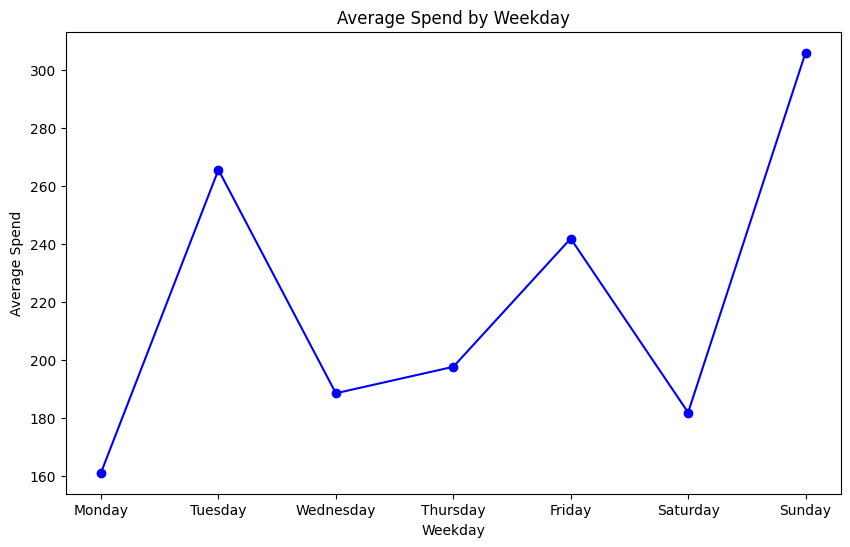

In [116]:
df['created_at'] = pd.to_datetime(df['created_at'])

# Aggregate data by weekdays
weekday_avg_spend = df.groupby('weekday')['spend'].mean().reset_index()

# Map weekdays to names
weekday_avg_spend['weekday_name'] = weekday_avg_spend['weekday'].map({
    0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
    4: 'Friday', 5: 'Saturday', 6: 'Sunday'
})

# Sort by weekday order
weekday_avg_spend = weekday_avg_spend.sort_values('weekday')

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(weekday_avg_spend['weekday_name'], weekday_avg_spend['spend'], marker='o', linestyle='-', color='blue')
plt.xlabel('Weekday')
plt.ylabel('Average Spend')
plt.title('Average Spend by Weekday')


Insights:
- The line plot of average spend by weekday provides a clear visual representation of spending patterns over the course of the week.
- The lowest average spending is done on Monday.
- The Highest average spending is done on Sunday.

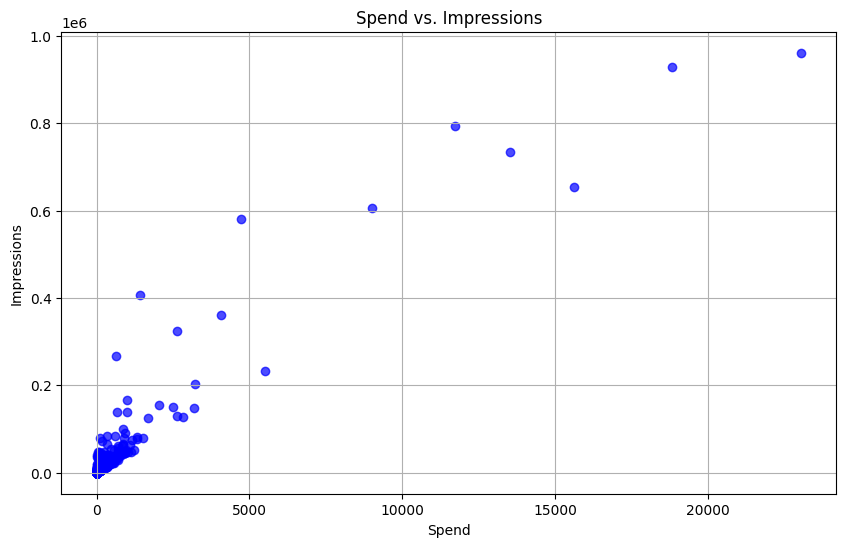

In [117]:
plt.figure(figsize=(10, 6))
plt.scatter(df['spend'], df['impressions'], color='blue', alpha=0.7)
plt.xlabel('Spend')
plt.ylabel('Impressions')
plt.title('Spend vs. Impressions')
plt.grid(True)
plt.show()


Insights:

- The scatter plot on Spend vs Impressions gives a clear understanding that there is positive relationship between Spend And Impressions.
- But some data points display that less spending also gives us more impressions.
- There is no data points which display a negatuve relationship between the 2 variables.

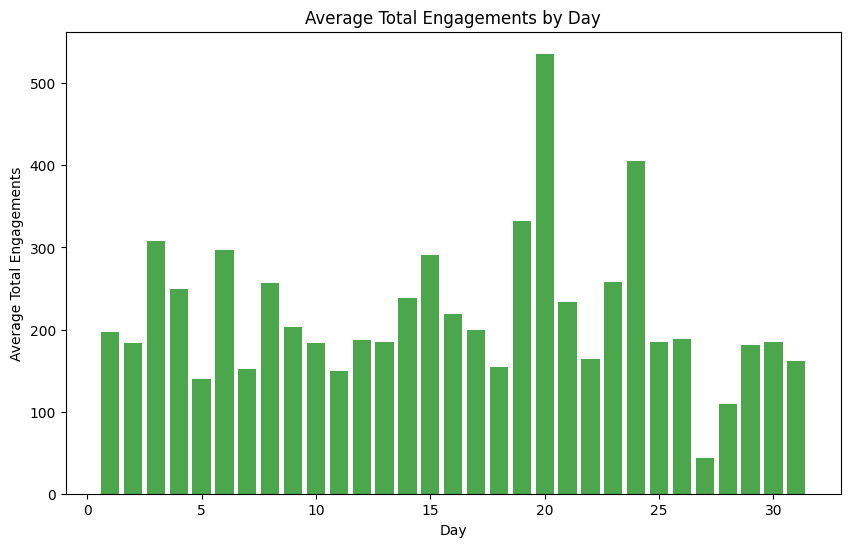

In [118]:
# Aggregate data by day
day_avg_engagements = df.groupby('day')['total engagements'].mean().reset_index()

# Bar plot: Total Engagements by Day
plt.figure(figsize=(10, 6))
plt.bar(day_avg_engagements['day'], day_avg_engagements['total engagements'], color='green', alpha=0.7)
plt.xlabel('Day')
plt.ylabel('Average Total Engagements')
plt.title('Average Total Engagements by Day')
plt.show()


Insights:

- The barplot on Average total Engagement by Day gives us a clear picture on the Average Engagements over the course of the month.
- The Average Total Engagements were at an all time low on the 27th day of the month.
- The Average Total Engagements were high on the 20th day of the month.
- The second highest Engagements were on 24th day of the month.

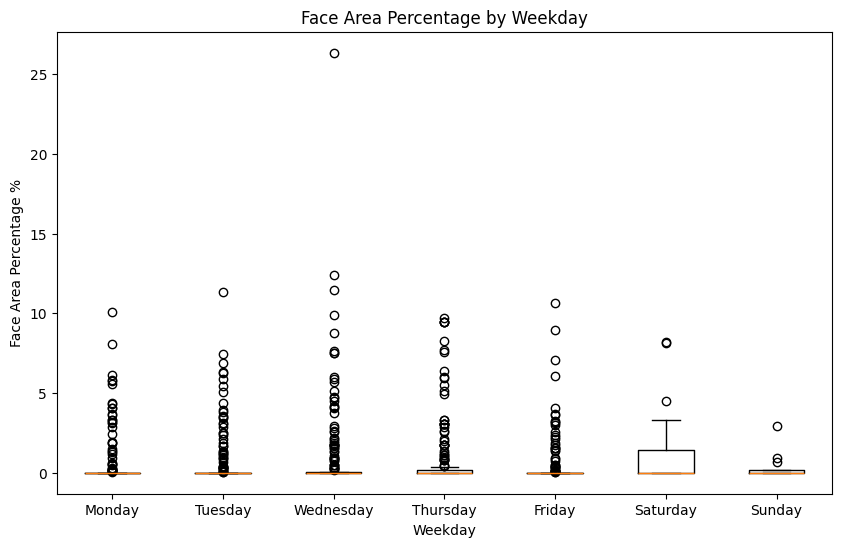

In [119]:
# Box plot: Face Area Percentage by Weekday
plt.figure(figsize=(10, 6))
plt.boxplot([df[df['weekday'] == i]['face area percentage %'] for i in range(7)], labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xlabel('Weekday')
plt.ylabel('Face Area Percentage %')
plt.title('Face Area Percentage by Weekday')
plt.show()


Insights:
- The box plot gives a data between face Area percentage and weekday.
- There a lot of data between the 

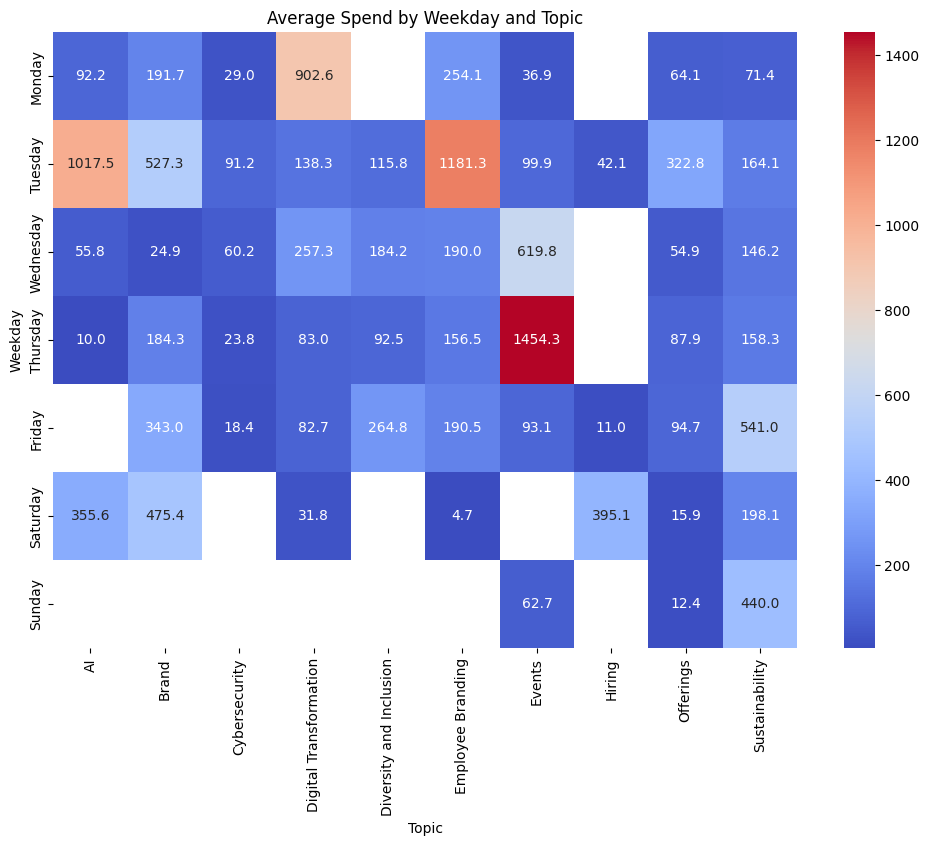

In [120]:
heatmap_data = df.pivot_table(values='spend', index='weekday', columns='topic', aggfunc='mean')

# Map weekdays to names
heatmap_data.index = heatmap_data.index.map({
    0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
    4: 'Friday', 5: 'Saturday', 6: 'Sunday'
})

# Heatmap: Spend by Weekday and Topic
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='.1f')
plt.xlabel('Topic')
plt.ylabel('Weekday')
plt.title('Average Spend by Weekday and Topic')
plt.show()

Insights:
- Thursday have high event values 
- Tuesday have large employee branding and AI

In [121]:
df.month.unique()

array([9, 8])

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

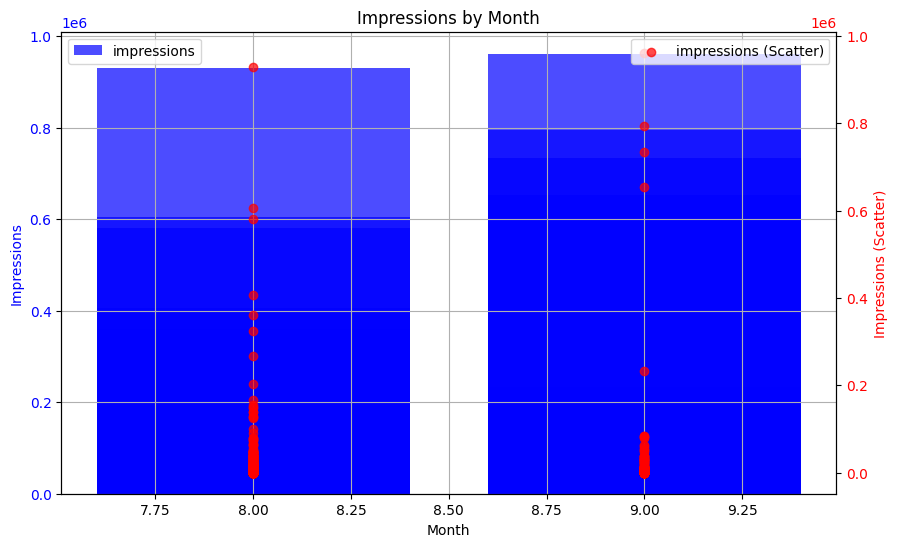

In [123]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot
ax1.bar(df['month'], df['impressions'], color='blue', alpha=0.7, label='impressions')
ax1.set_xlabel('Month')
ax1.set_ylabel('Impressions', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Impressions by Month')

# Scatter plot with a secondary y-axis
ax2 = ax1.twinx()
ax2.scatter(df['month'], df['impressions'], color='red', alpha=0.7, label='impressions (Scatter)')
ax2.set_ylabel('Impressions (Scatter)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add grid
ax1.grid(True)

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

Text(0, 0.5, 'Impressions')

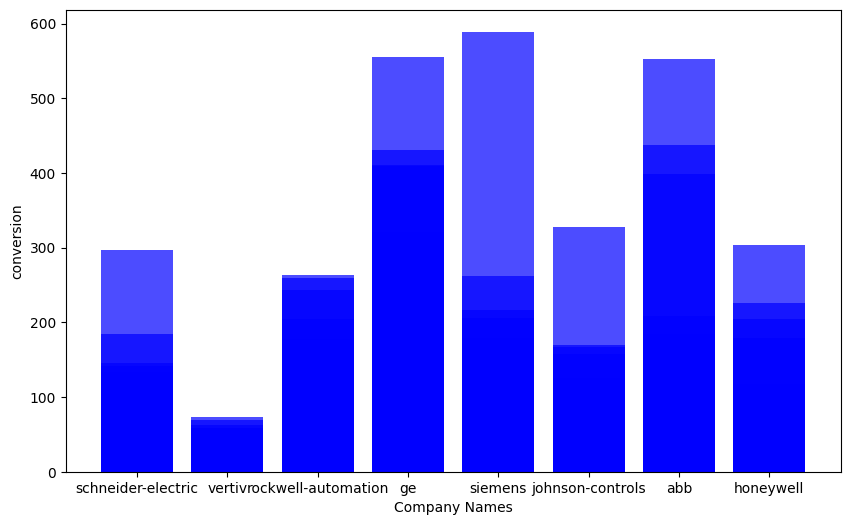

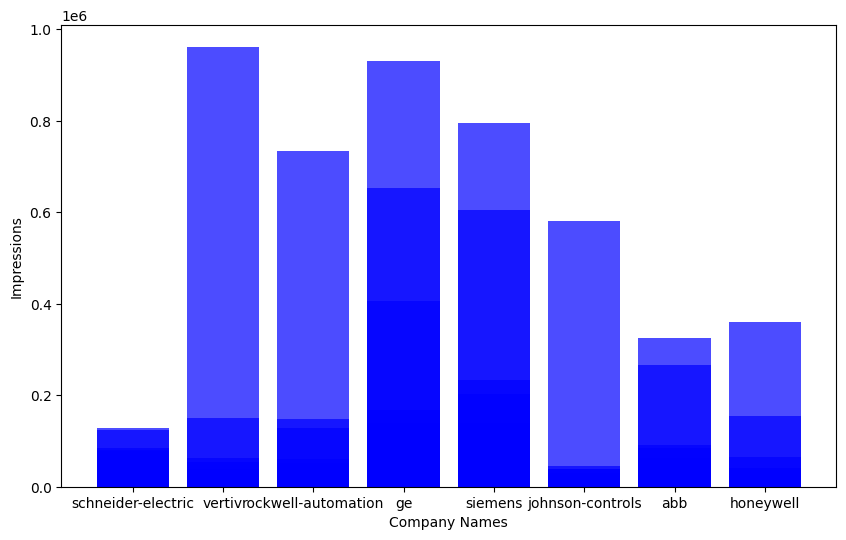

In [124]:
plt.figure(figsize=(10,6))
plt.bar(df['company name'], df['conversion'], color='blue', alpha=0.7, label='impressions')
plt.xlabel('Company Names')
plt.ylabel('conversion')


plt.figure(figsize=(10,6))
plt.bar(df['company name'], df['impressions'], color='blue', alpha=0.7, label='impressions')
plt.xlabel('Company Names')
plt.ylabel('Impressions')

Insights:
- Vetrivrockwell and ge have high impression
- Siemens and ge have high conversion

In [125]:
df

,company name,spend,impressions,likecount,commentcount,repostcount,total engagements,conversion,action,type,created_at,size,number of faces,face emotion,face position,face area percentage %,number of objects,primary object area percentage %,secondary object area percentage %,text length,logo 1 area percentage %,logo 2 area percentage %,number of persons,person area,text area %,empty space %,topic,language,# faces,# persons,# objects,month,day,weekday,weekday_name
0,schneider-electric,5.85,479,31,0,2,33,7,Post,Document,2023-09-13 09:46:04,100x100,0,NaN,NaN,0.000000,0,0.000000,0.000000,0,0.000000,0.000000,0,0.000000,0.00,> 40%,Offerings,English,0,0,0,9,5,1,Tuesday
1,schneider-electric,1.80,3880,224,1,9,234,0,Post,Image,2023-09-13 09:46:04,800x420,0,NaN,NaN,0.000000,1,57.181154,0.000000,37,0.714286,0.000000,0,0.000000,1.85,> 40%,Offerings,English,0,0,1,9,1,4,Friday
2,schneider-electric,2.32,785,55,1,16,72,11,Post,Video (LinkedIn Source),2023-09-13 09:46:04,100x100,0,NaN,NaN,0.000000,0,0.000000,0.000000,0,0.000000,0.000000,0,0.000000,0.00,> 40%,Sustainability,English,0,0,0,9,4,0,Monday
3,schneider-electric,3.94,658,54,1,5,60,8,Post,Video (LinkedIn Source),2023-09-13 09:46:04,100x100,0,NaN,NaN,0.000000,0,0.000000,0.000000,0,0.000000,0.000000,0,0.000000,0.00,> 40%,Sustainability,English,0,0,0,9,4,0,Monday
4,schneider-electric,3.89,2568,168,1,5,174,25,Post,Video (LinkedIn Source),2023-09-13 09:46:04,1200x630,2,Joy,top-center,4.381481,6,54.487621,30.206522,21,0.761905,0.414683,3,125.009998,1.05,10% to 20%,Sustainability,English,2 to 4,2 to 4,5 or more,9,4,0,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,rockwell-automation,0.89,536,34,1,1,36,1,Post,Video (LinkedIn Source),2023-09-21 08:39:25,100x100,0,NaN,NaN,0.000000,0,0.000000,0.000000,0,0.000000,0.000000,0,0.000000,0.00,> 40%,Offerings,English,0,0,0,8,4,4,Friday
1050,rockwell-automation,1.88,154,12,0,0,12,3,Post,Image,2023-09-21 08:39:25,800x450,0,NaN,NaN,0.000000,3,0.000000,0.000000,23,0.000000,0.000000,0,0.000000,1.15,> 40%,Offerings,Korean,0,0,2 to 4,8,8,1,Tuesday
1051,rockwell-automation,713.23,61614,622,2,80,704,105,Post,Video (LinkedIn Source),2023-09-21 08:10:42,100x100,0,NaN,NaN,0.000000,0,0.000000,0.000000,0,0.000000,0.000000,0,0.000000,0.00,> 40%,Offerings,English,0,0,0,8,4,4,Friday
1052,rockwell-automation,15.41,1000,32,0,1,33,2,Post,Image,2023-09-21 08:39:25,800x533,2,Joy,center-left,0.000000,8,0.000000,0.000000,0,0.000000,0.000000,4,148.354582,0.00,> 40%,Sustainability,English,2 to 4,2 to 4,5 or more,8,8,1,Tuesday


In [126]:
df

,company name,spend,impressions,likecount,commentcount,repostcount,total engagements,conversion,action,type,created_at,size,number of faces,face emotion,face position,face area percentage %,number of objects,primary object area percentage %,secondary object area percentage %,text length,logo 1 area percentage %,logo 2 area percentage %,number of persons,person area,text area %,empty space %,topic,language,# faces,# persons,# objects,month,day,weekday,weekday_name
0,schneider-electric,5.85,479,31,0,2,33,7,Post,Document,2023-09-13 09:46:04,100x100,0,NaN,NaN,0.000000,0,0.000000,0.000000,0,0.000000,0.000000,0,0.000000,0.00,> 40%,Offerings,English,0,0,0,9,5,1,Tuesday
1,schneider-electric,1.80,3880,224,1,9,234,0,Post,Image,2023-09-13 09:46:04,800x420,0,NaN,NaN,0.000000,1,57.181154,0.000000,37,0.714286,0.000000,0,0.000000,1.85,> 40%,Offerings,English,0,0,1,9,1,4,Friday
2,schneider-electric,2.32,785,55,1,16,72,11,Post,Video (LinkedIn Source),2023-09-13 09:46:04,100x100,0,NaN,NaN,0.000000,0,0.000000,0.000000,0,0.000000,0.000000,0,0.000000,0.00,> 40%,Sustainability,English,0,0,0,9,4,0,Monday
3,schneider-electric,3.94,658,54,1,5,60,8,Post,Video (LinkedIn Source),2023-09-13 09:46:04,100x100,0,NaN,NaN,0.000000,0,0.000000,0.000000,0,0.000000,0.000000,0,0.000000,0.00,> 40%,Sustainability,English,0,0,0,9,4,0,Monday
4,schneider-electric,3.89,2568,168,1,5,174,25,Post,Video (LinkedIn Source),2023-09-13 09:46:04,1200x630,2,Joy,top-center,4.381481,6,54.487621,30.206522,21,0.761905,0.414683,3,125.009998,1.05,10% to 20%,Sustainability,English,2 to 4,2 to 4,5 or more,9,4,0,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,rockwell-automation,0.89,536,34,1,1,36,1,Post,Video (LinkedIn Source),2023-09-21 08:39:25,100x100,0,NaN,NaN,0.000000,0,0.000000,0.000000,0,0.000000,0.000000,0,0.000000,0.00,> 40%,Offerings,English,0,0,0,8,4,4,Friday
1050,rockwell-automation,1.88,154,12,0,0,12,3,Post,Image,2023-09-21 08:39:25,800x450,0,NaN,NaN,0.000000,3,0.000000,0.000000,23,0.000000,0.000000,0,0.000000,1.15,> 40%,Offerings,Korean,0,0,2 to 4,8,8,1,Tuesday
1051,rockwell-automation,713.23,61614,622,2,80,704,105,Post,Video (LinkedIn Source),2023-09-21 08:10:42,100x100,0,NaN,NaN,0.000000,0,0.000000,0.000000,0,0.000000,0.000000,0,0.000000,0.00,> 40%,Offerings,English,0,0,0,8,4,4,Friday
1052,rockwell-automation,15.41,1000,32,0,1,33,2,Post,Image,2023-09-21 08:39:25,800x533,2,Joy,center-left,0.000000,8,0.000000,0.000000,0,0.000000,0.000000,4,148.354582,0.00,> 40%,Sustainability,English,2 to 4,2 to 4,5 or more,8,8,1,Tuesday


### Split Numerical and Catergorical columns for Analysis

In [127]:
df_num=df.select_dtypes(exclude='object')
df_var=df.select_dtypes(include='object')

### Check for the correlation between the independent columns

<Axes: >

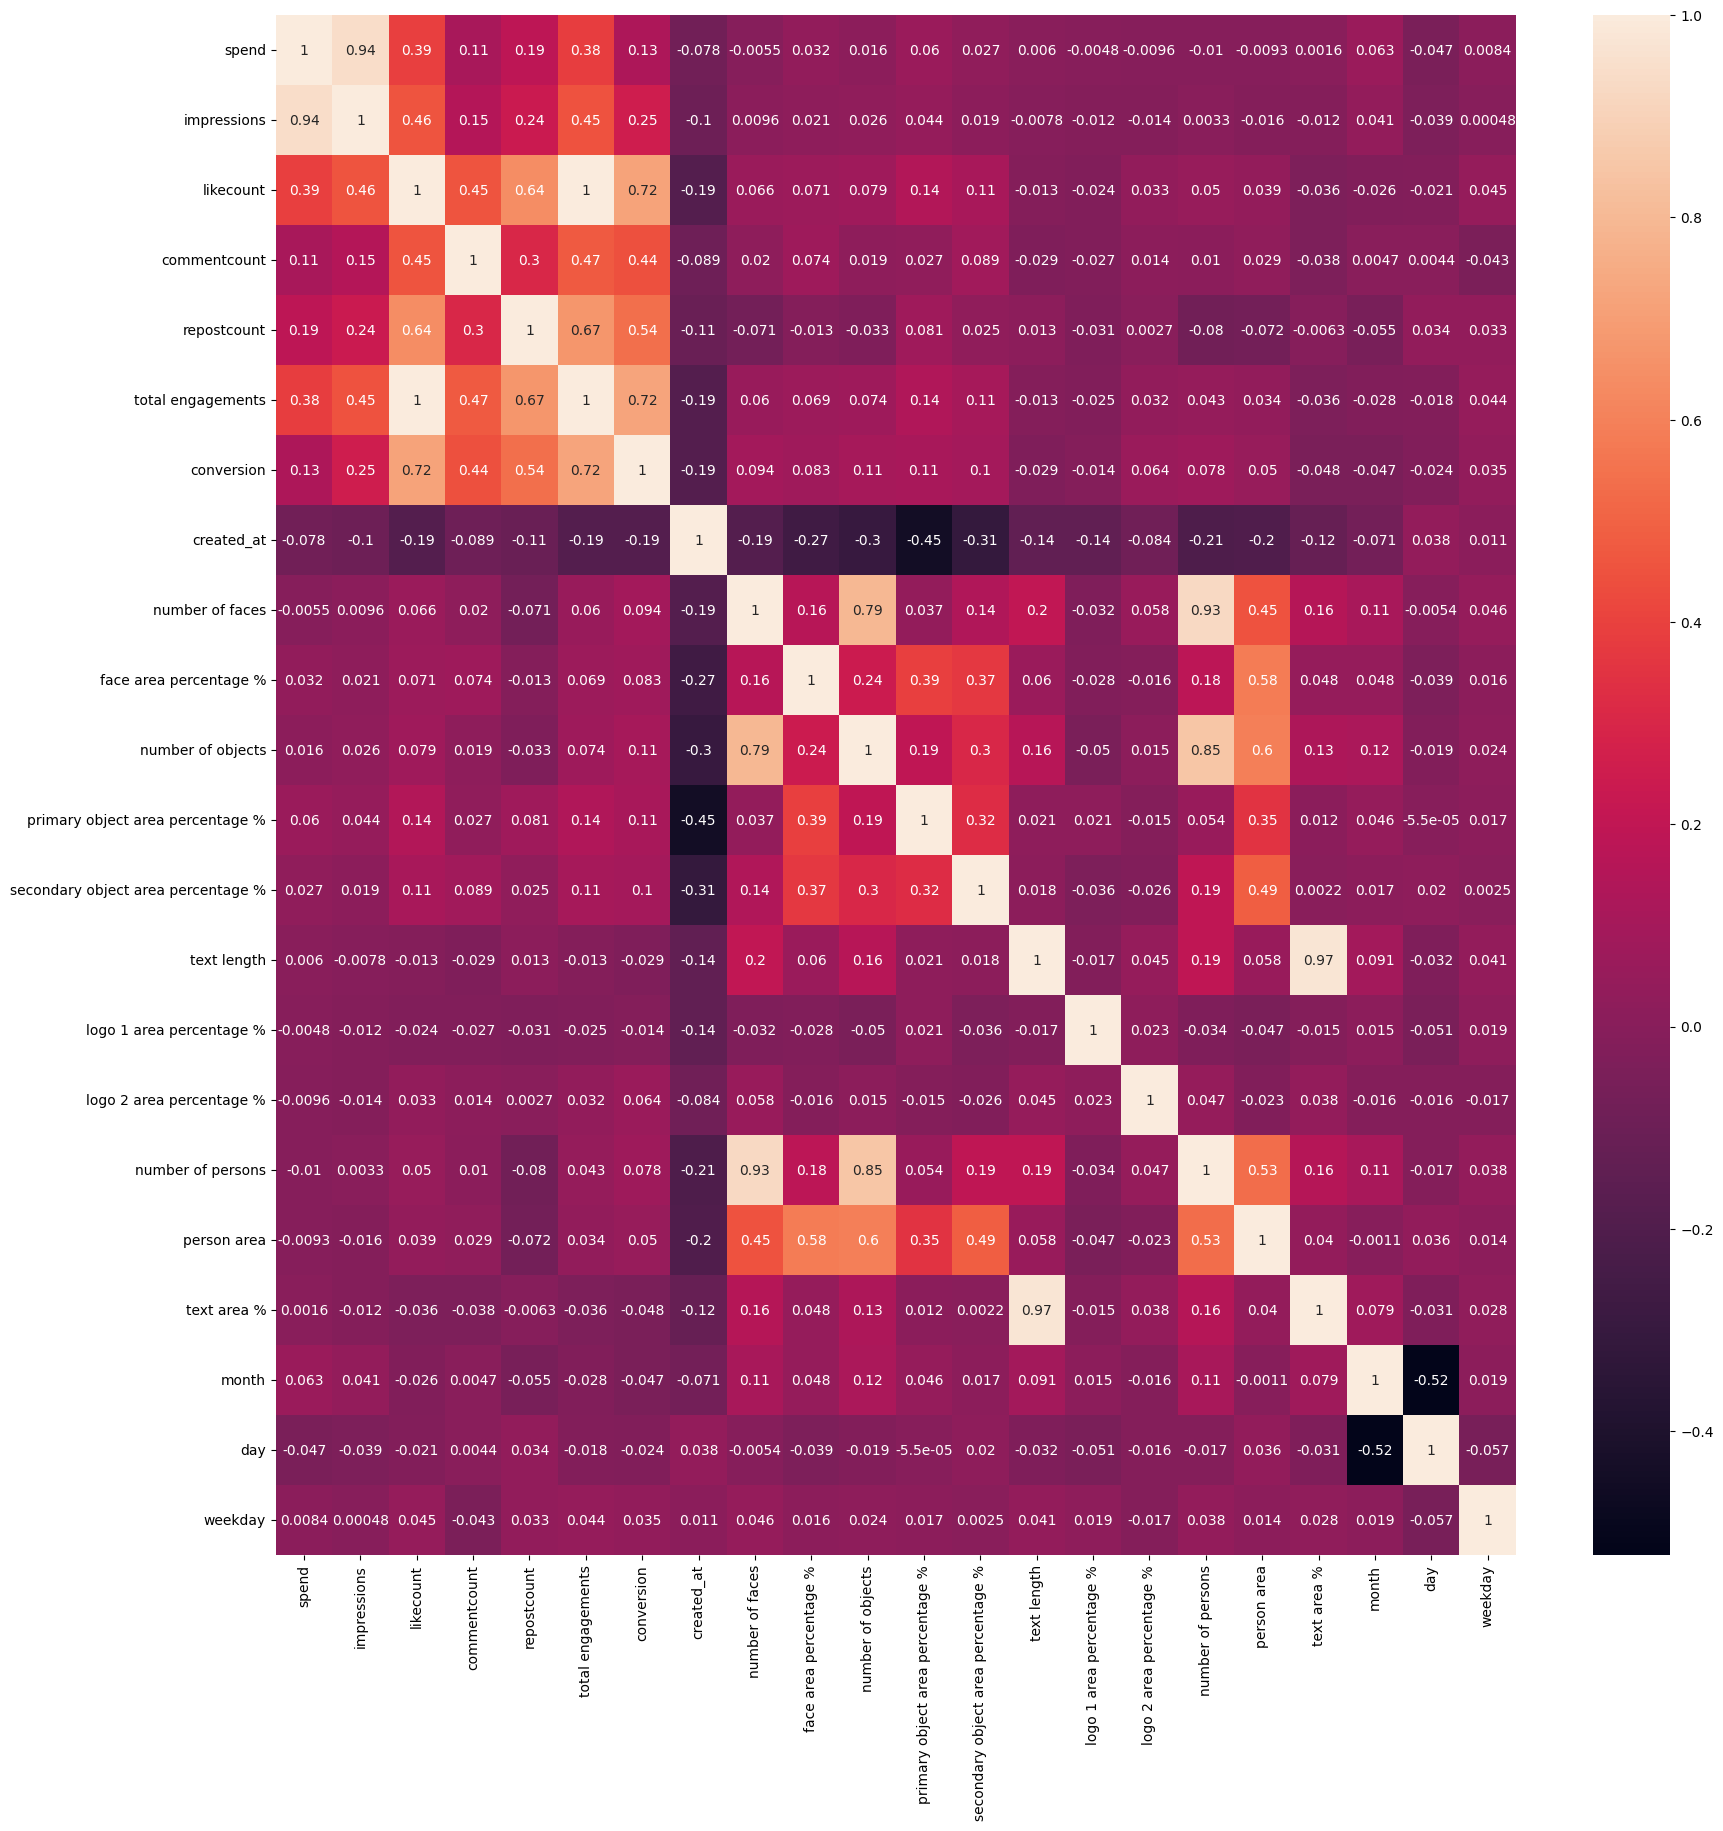

In [128]:
plt.figure(figsize=(20,20))
sns.heatmap(df_num.corr(),annot=True)

### Store the highly correlated column with output column

In [129]:
corrr=df[['likecount','likecount','commentcount','repostcount']]
corrr

,likecount,likecount,commentcount,repostcount
0,31,31,0,2
1,224,224,1,9
2,55,55,1,16
3,54,54,1,5
4,168,168,1,5
...,...,...,...,...
1049,34,34,1,1
1050,12,12,0,0
1051,622,622,2,80
1052,32,32,0,1


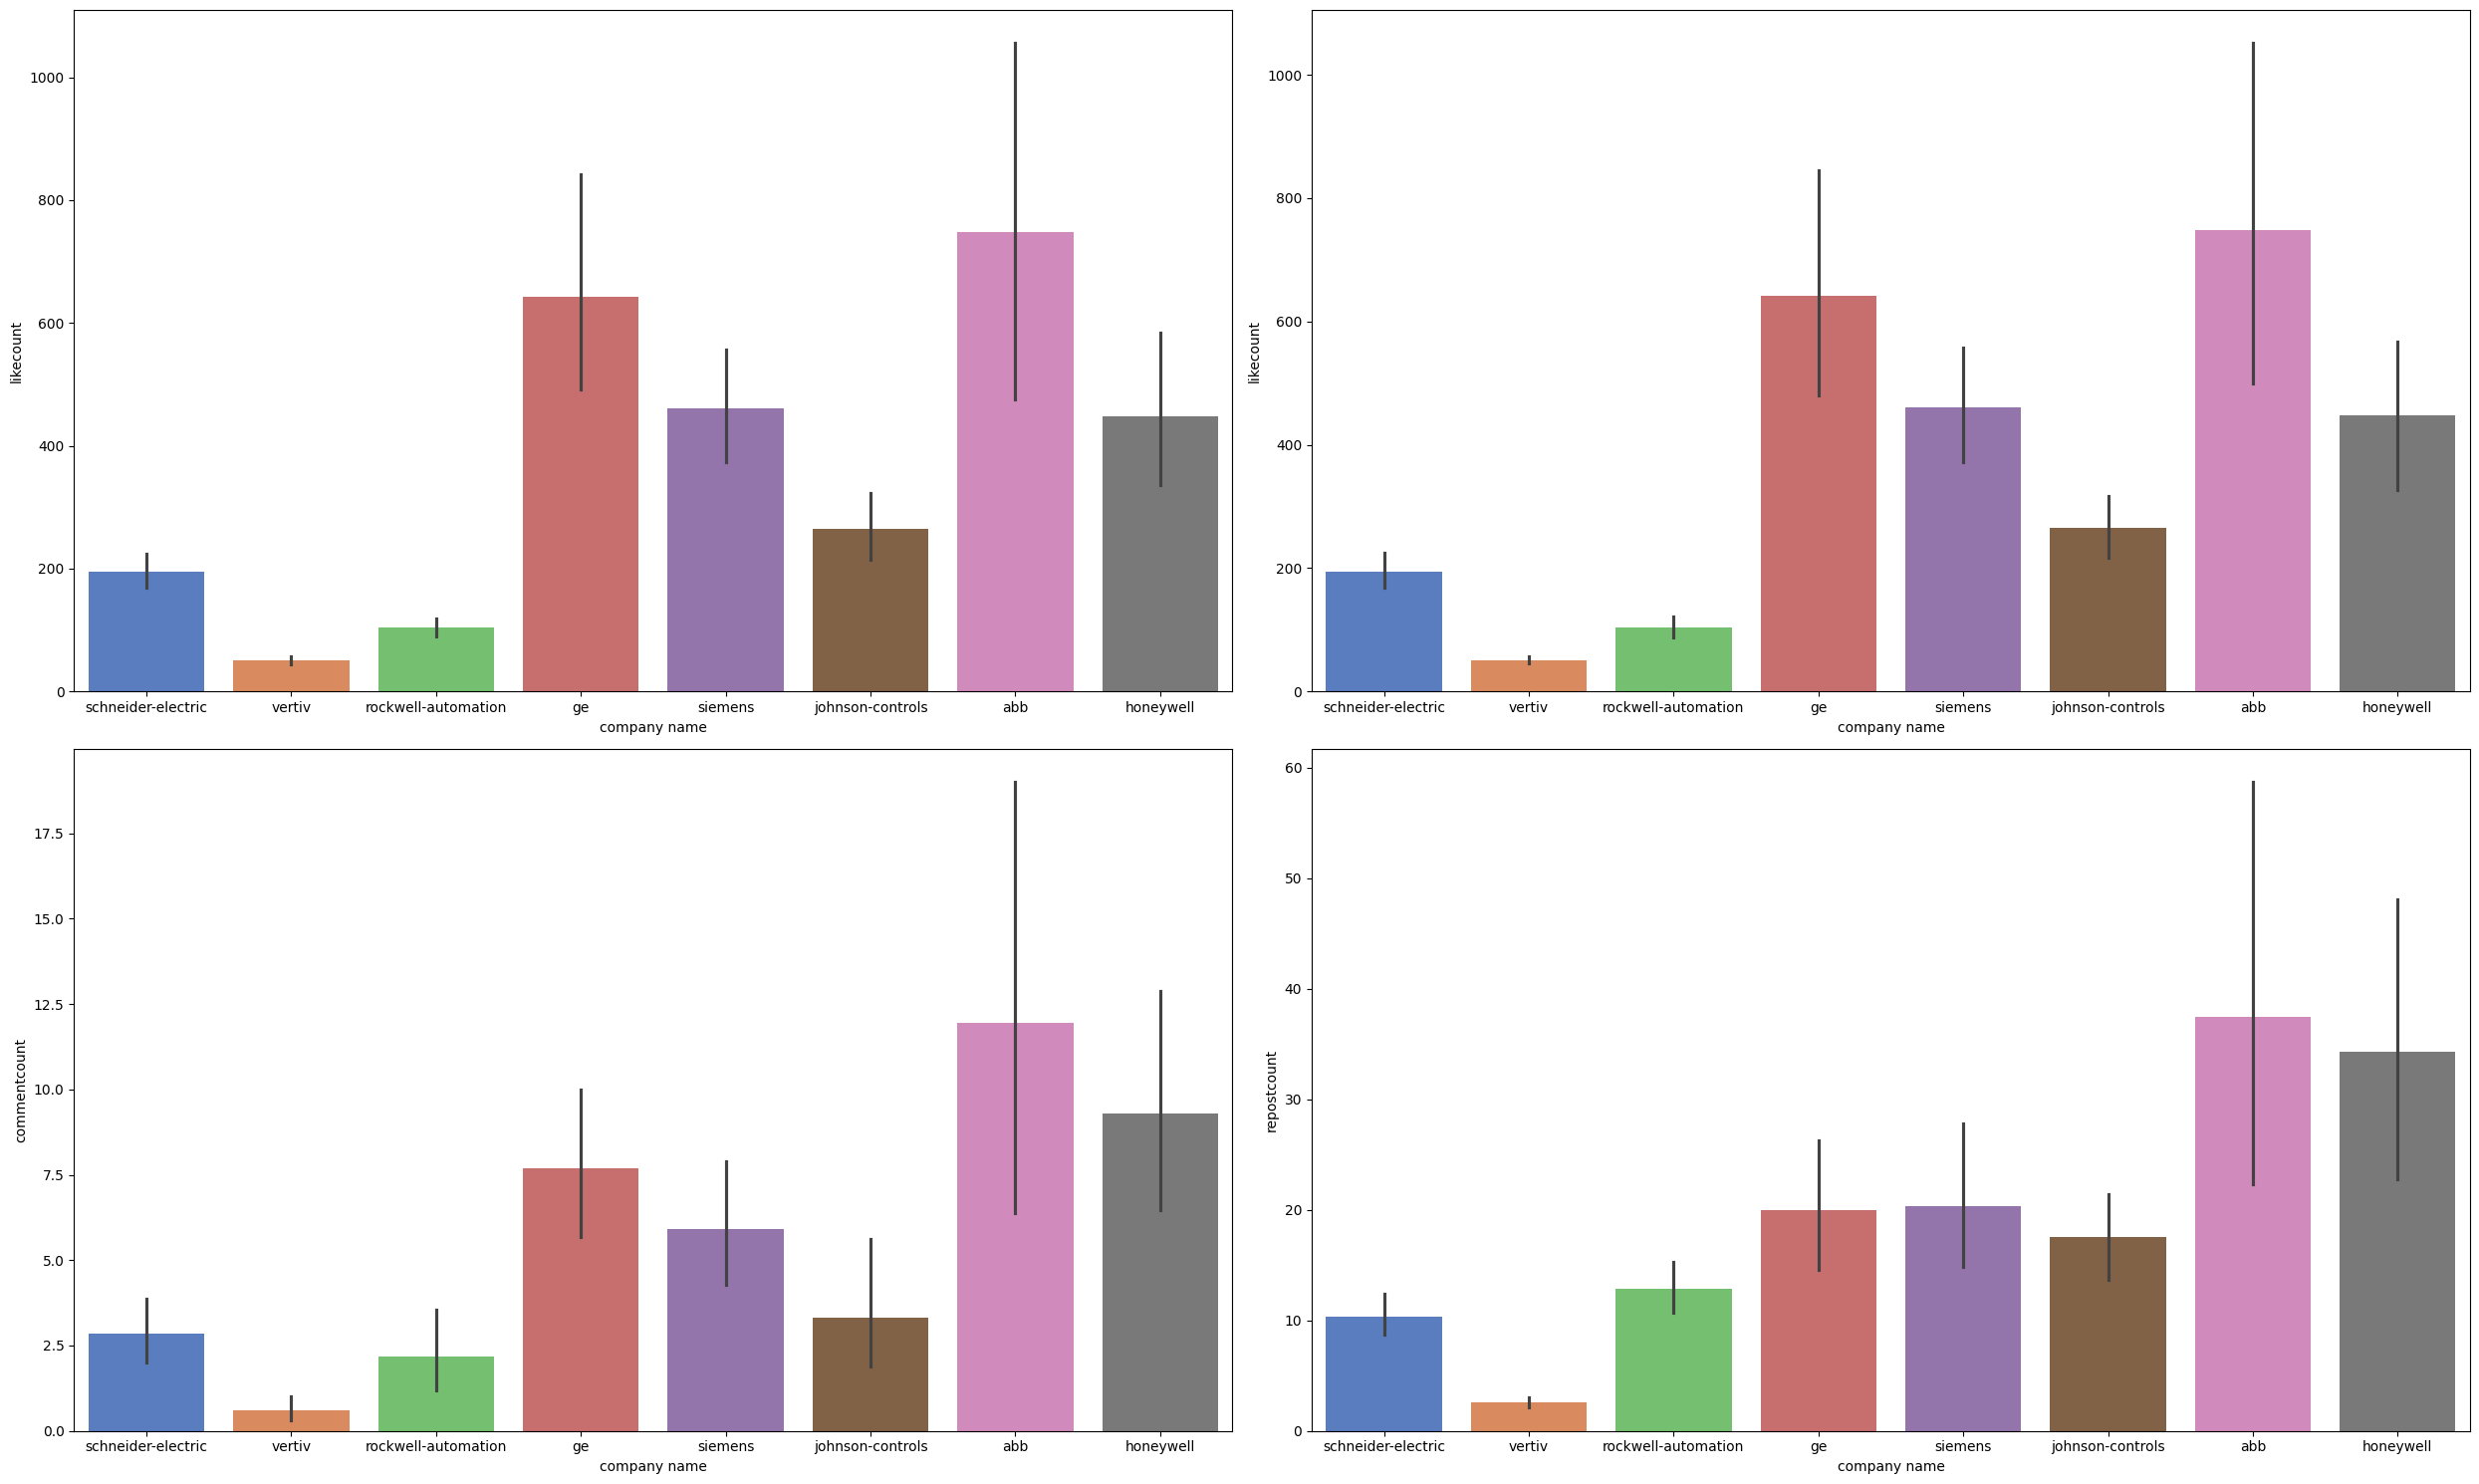

In [130]:
palette = sns.color_palette("muted", len(df['company name']))

plt.figure(figsize=(25,15))
p=1
for i in corrr:
    if p<5:
        plt.subplot(2,2,p)
        sns.barplot(y=df[i],x=df['company name'],palette=palette)
    p+=1
plt.tight_layout()

<Axes: xlabel='type', ylabel='impressions'>

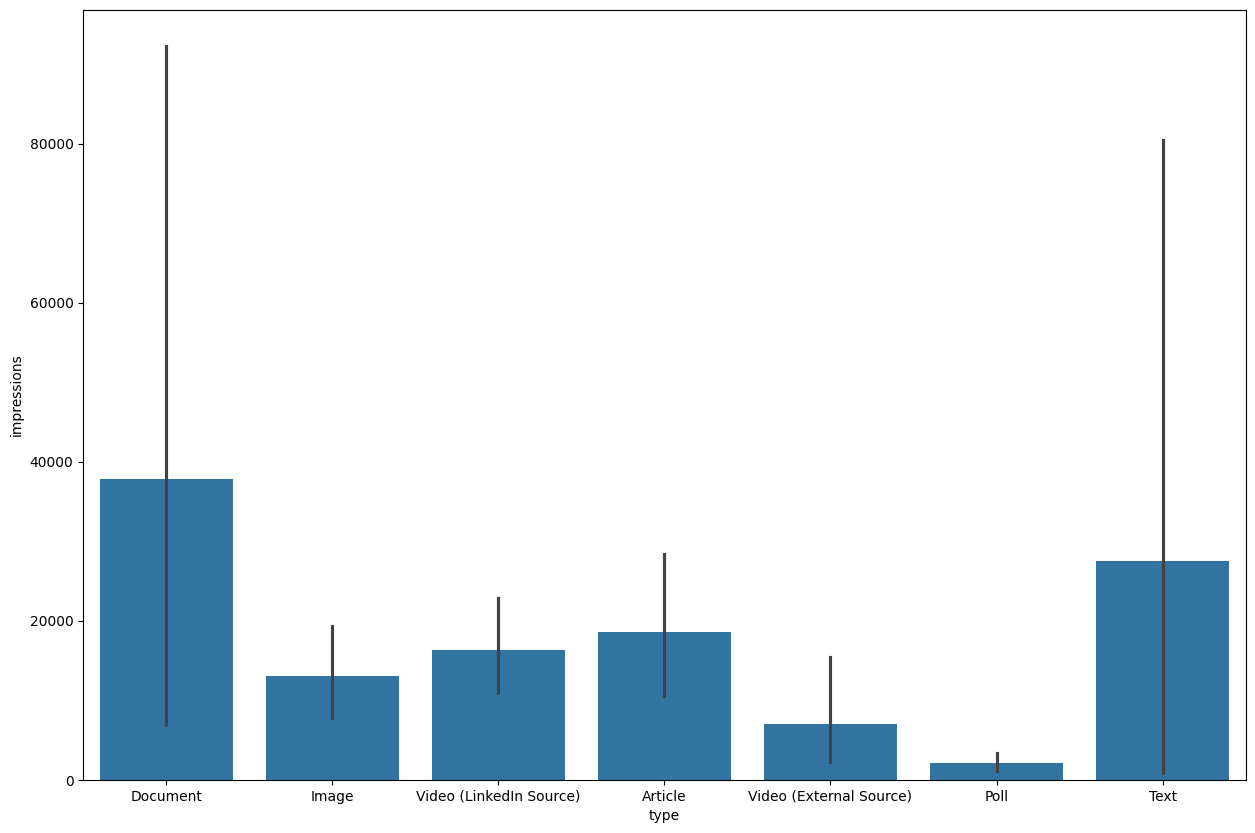

In [132]:
plt.figure(figsize=(15,10))
sns.barplot(x=df['type'],y=df['impressions'])

Insights:
- Document and Text have high impressions

In [133]:
df.action.unique()

array(['Post', 'Siemens reposted this', 'GE reposted this'], dtype=object)

In [134]:
df.isnull().sum()

company name                            0
spend                                   0
impressions                             0
likecount                               0
commentcount                            0
repostcount                             0
total engagements                       0
conversion                              0
action                                  0
type                                    0
created_at                              0
size                                    0
number of faces                         0
face emotion                          760
face position                         760
face area percentage %                  0
number of objects                       0
primary object area percentage %        0
secondary object area percentage %      0
text length                             0
logo 1 area percentage %                0
logo 2 area percentage %                0
number of persons                       0
person area                       

### Remove the null values column above 50%

In [135]:
df.drop(['created_at','face emotion','face position','face area percentage %'],axis=1,inplace=True)

In [136]:
df

,company name,spend,impressions,likecount,commentcount,repostcount,total engagements,conversion,action,type,size,number of faces,number of objects,primary object area percentage %,secondary object area percentage %,text length,logo 1 area percentage %,logo 2 area percentage %,number of persons,person area,text area %,empty space %,topic,language,# faces,# persons,# objects,month,day,weekday,weekday_name
0,schneider-electric,5.85,479,31,0,2,33,7,Post,Document,100x100,0,0,0.000000,0.000000,0,0.000000,0.000000,0,0.000000,0.00,> 40%,Offerings,English,0,0,0,9,5,1,Tuesday
1,schneider-electric,1.80,3880,224,1,9,234,0,Post,Image,800x420,0,1,57.181154,0.000000,37,0.714286,0.000000,0,0.000000,1.85,> 40%,Offerings,English,0,0,1,9,1,4,Friday
2,schneider-electric,2.32,785,55,1,16,72,11,Post,Video (LinkedIn Source),100x100,0,0,0.000000,0.000000,0,0.000000,0.000000,0,0.000000,0.00,> 40%,Sustainability,English,0,0,0,9,4,0,Monday
3,schneider-electric,3.94,658,54,1,5,60,8,Post,Video (LinkedIn Source),100x100,0,0,0.000000,0.000000,0,0.000000,0.000000,0,0.000000,0.00,> 40%,Sustainability,English,0,0,0,9,4,0,Monday
4,schneider-electric,3.89,2568,168,1,5,174,25,Post,Video (LinkedIn Source),1200x630,2,6,54.487621,30.206522,21,0.761905,0.414683,3,125.009998,1.05,10% to 20%,Sustainability,English,2 to 4,2 to 4,5 or more,9,4,0,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,rockwell-automation,0.89,536,34,1,1,36,1,Post,Video (LinkedIn Source),100x100,0,0,0.000000,0.000000,0,0.000000,0.000000,0,0.000000,0.00,> 40%,Offerings,English,0,0,0,8,4,4,Friday
1050,rockwell-automation,1.88,154,12,0,0,12,3,Post,Image,800x450,0,3,0.000000,0.000000,23,0.000000,0.000000,0,0.000000,1.15,> 40%,Offerings,Korean,0,0,2 to 4,8,8,1,Tuesday
1051,rockwell-automation,713.23,61614,622,2,80,704,105,Post,Video (LinkedIn Source),100x100,0,0,0.000000,0.000000,0,0.000000,0.000000,0,0.000000,0.00,> 40%,Offerings,English,0,0,0,8,4,4,Friday
1052,rockwell-automation,15.41,1000,32,0,1,33,2,Post,Image,800x533,2,8,0.000000,0.000000,0,0.000000,0.000000,4,148.354582,0.00,> 40%,Sustainability,English,2 to 4,2 to 4,5 or more,8,8,1,Tuesday


In [137]:
df.isnull().sum()

company name                          0
spend                                 0
impressions                           0
likecount                             0
commentcount                          0
repostcount                           0
total engagements                     0
conversion                            0
action                                0
type                                  0
size                                  0
number of faces                       0
number of objects                     0
primary object area percentage %      0
secondary object area percentage %    0
text length                           0
logo 1 area percentage %              0
logo 2 area percentage %              0
number of persons                     0
person area                           0
text area %                           0
empty space %                         0
topic                                 0
language                              0
# faces                               0


### Encoding by using Label Encoder

In [138]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
for i in df:
    df[i]=l.fit_transform(df[i])

<Axes: >

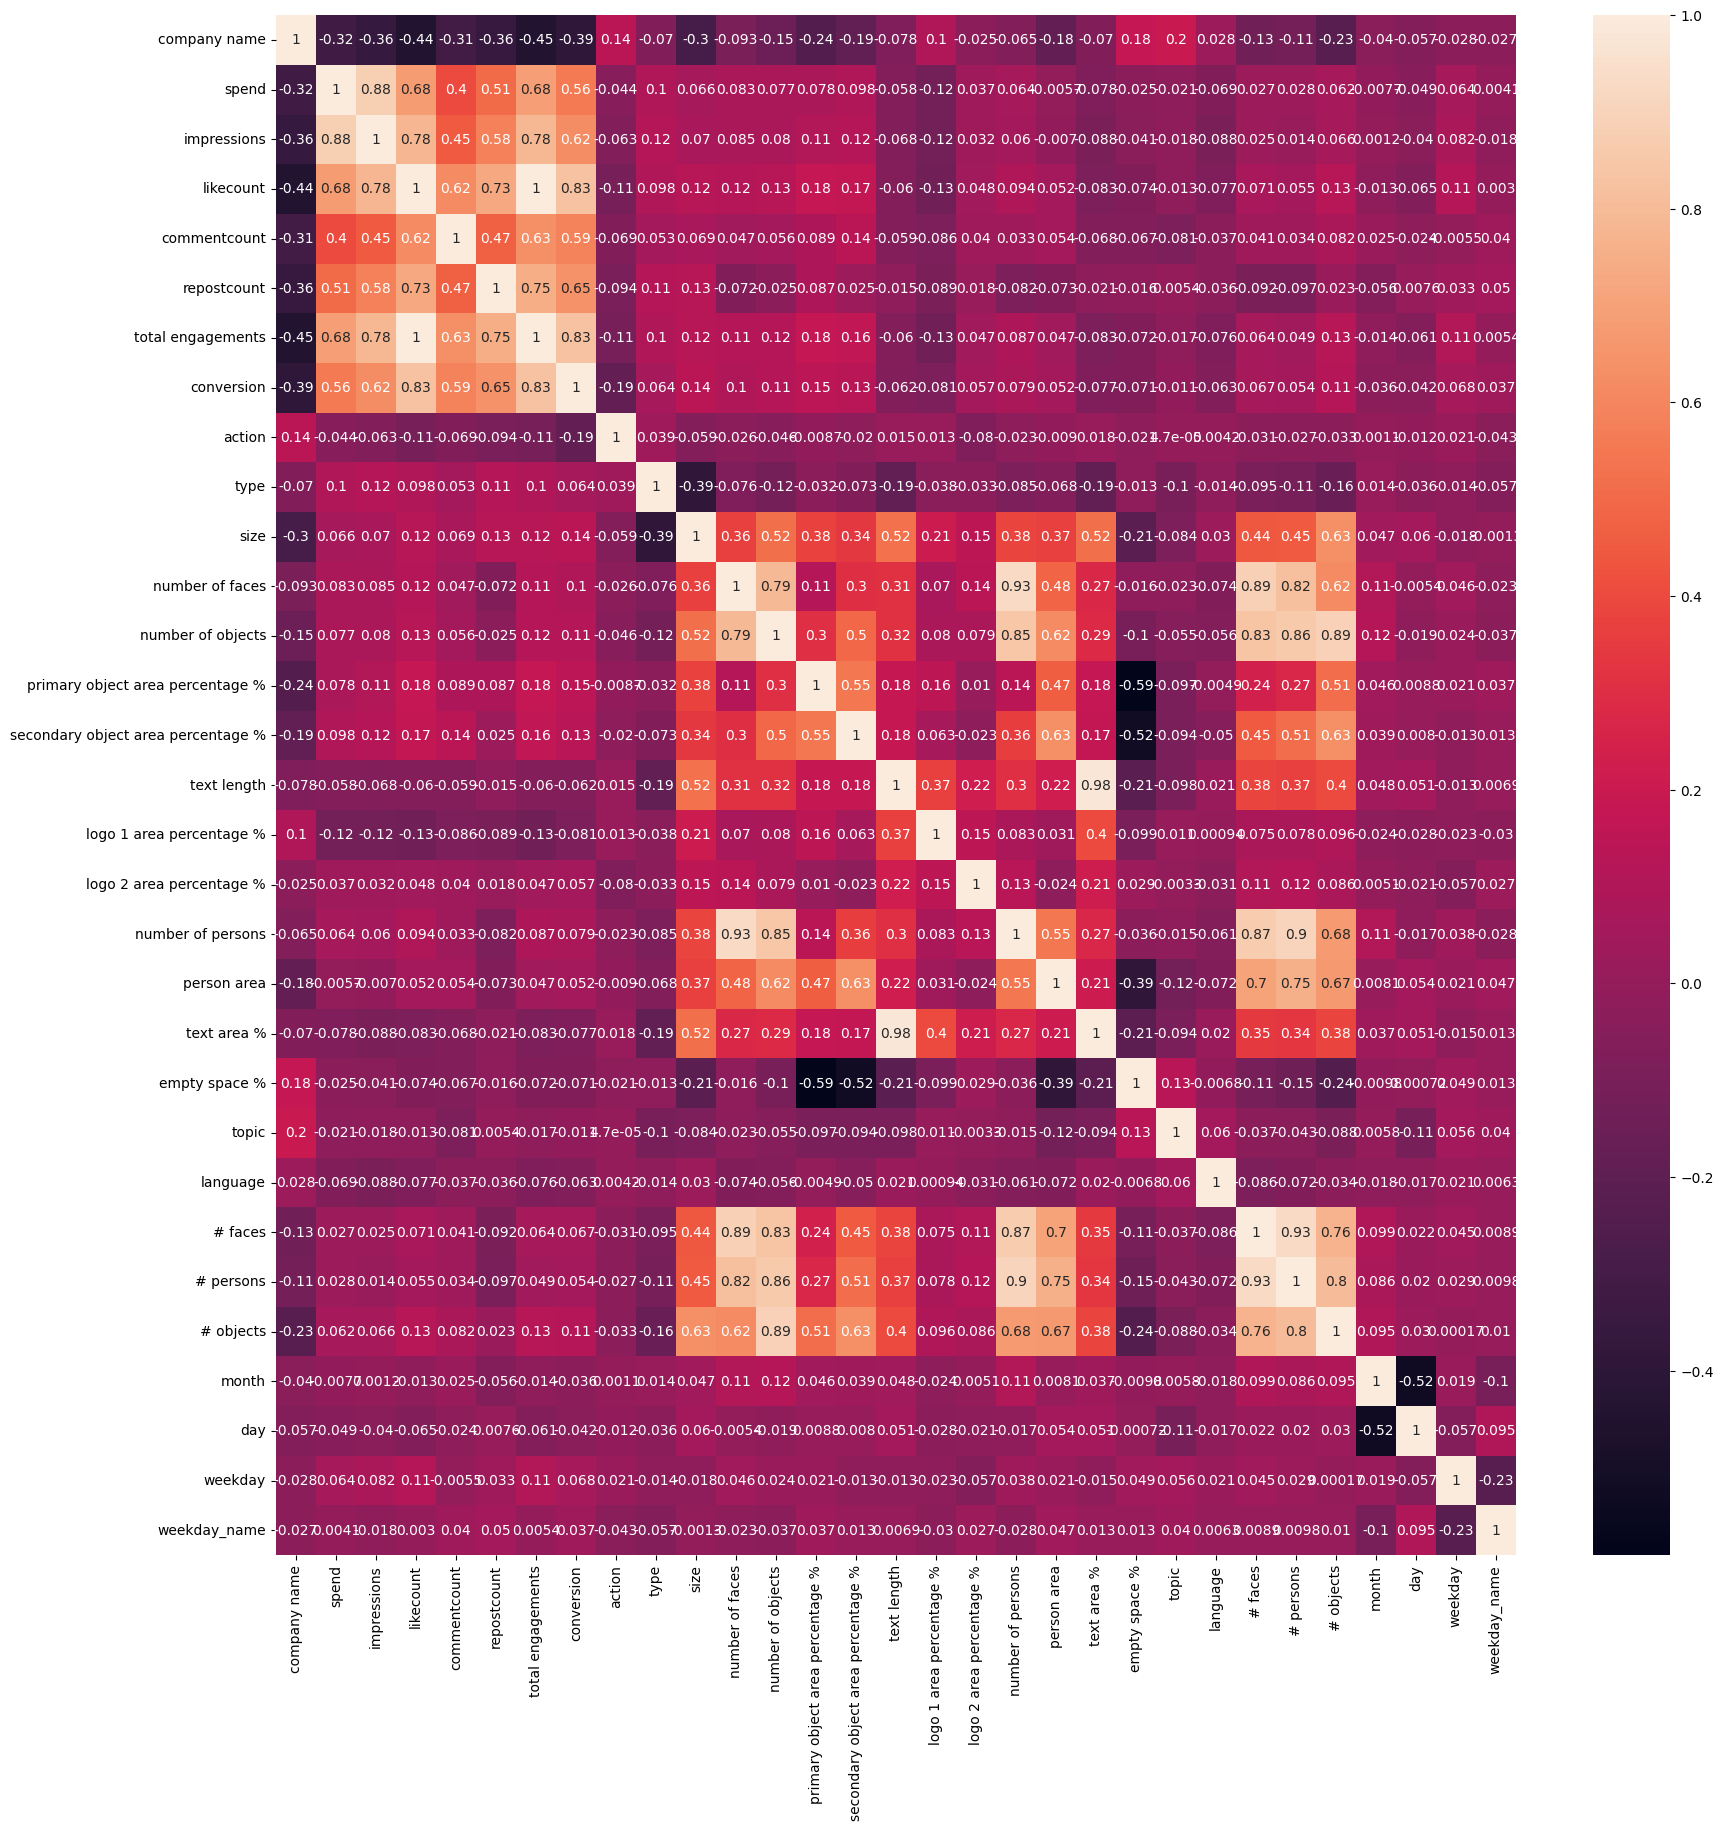

In [139]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

### Check for the intercorrelation above 90%

In [140]:
corr=df.corr()
threshold=0.9
high_corr=corr.abs()>threshold

for col in high_corr.columns:
    high_corr[col].loc[col]=False
    
high_corr_pair=high_corr[high_corr.any(axis=1)]
high_corr_pair

print('Highly Correlated Columns:')
for col in high_corr_pair.columns:
    for idx in high_corr_pair.index:
        if high_corr_pair.at[idx,col]:
            print(f"{col} - {idx}: {corr.loc[col, idx]}")


Highly Correlated Columns:
likecount - total engagements: 0.9986242989057825
total engagements - likecount: 0.9986242989057825
number of faces - number of persons: 0.9261268065467843
text length - text area %: 0.9810245631298209
number of persons - number of faces: 0.9261268065467843
number of persons - # persons: 0.9011318131372285
text area % - text length: 0.9810245631298209
# faces - # persons: 0.931450827702687
# persons - number of persons: 0.9011318131372285
# persons - # faces: 0.931450827702687


### Drop those columns 

In [141]:
df.drop(['total engagements','number of persons','text area %','# persons'],axis=1,inplace=True)

In [142]:
df.drop(['weekday_name'],axis=1,inplace=True)

In [143]:
df

,company name,spend,impressions,likecount,commentcount,repostcount,conversion,action,type,size,number of faces,number of objects,primary object area percentage %,secondary object area percentage %,text length,logo 1 area percentage %,logo 2 area percentage %,person area,empty space %,topic,language,# faces,# objects,month,day,weekday
0,5,205,140,31,0,2,7,1,1,0,0,0,0,0,0,0,0,0,3,8,2,0,0,1,4,1
1,5,81,596,176,1,9,0,1,2,54,0,1,350,0,34,21,0,0,3,8,2,0,1,1,0,4
2,5,107,225,53,1,16,11,1,6,0,0,0,0,0,0,0,0,0,3,9,2,0,0,1,3,0
3,5,156,199,52,1,5,8,1,6,0,0,0,0,0,0,0,0,0,3,9,2,0,0,1,3,0
4,5,154,480,141,1,5,25,1,6,2,2,6,344,261,21,29,1,249,0,9,2,2,3,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,4,40,161,34,1,1,1,1,6,0,0,0,0,0,0,0,0,0,3,8,2,0,0,0,3,4
1050,4,83,50,12,0,0,3,1,2,61,0,3,0,0,23,0,0,0,3,8,4,0,2,0,7,1
1051,4,932,961,291,2,64,97,1,6,0,0,0,0,0,0,0,0,0,3,8,2,0,0,0,3,4
1052,4,366,270,32,0,1,2,1,2,69,2,8,0,0,0,0,0,250,3,9,2,2,3,0,7,1


### create the new variable for scaling and outiers handling

In [166]:
df1=df.copy()
df2=df.copy()

### Splitting the data 

In [167]:
x=df.drop('conversion',axis=1)
y=df.conversion

In [168]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

### Model Training

In [169]:
from sklearn.linear_model import LinearRegression 
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [170]:
y_pred_lr=lr.predict(x_test)

In [171]:
from sklearn.metrics import r2_score
r2_score(y_pred_lr,y_test)

0.5528153132658402

In [172]:
from xgboost import XGBRFRegressor
xg=XGBRFRegressor()
xg.fit(x_train,y_train)

XGBRFRegressor(base_score=0.5, booster='gbtree', callbacks=None,
               colsample_bylevel=1, colsample_bytree=1,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
               importance_type=None, interaction_constraints='', max_bin=256,
               max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=0, num_parallel_tree=100,
               objective='reg:squarederror', predictor='auto', random_state=0,
               reg_alpha=0, sampling_method='uniform', scale_pos_weight=1, ...)

In [173]:
y_pred_xg=xg.predict(x_test)
r2_score(y_test,y_pred_xg)

0.7154705594144045

In [174]:
from sklearn.tree import DecisionTreeRegressor
tr=DecisionTreeRegressor()
tr.fit(x_train,y_train)

DecisionTreeRegressor()

In [175]:
y_pred_tr=tr.predict(x_test)
r2_score(y_test,y_pred_tr)

0.5229414575191776

In [176]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)

GradientBoostingRegressor()

In [177]:
y_pred_gb=gb.predict(x_test)
r2_score(y_test,y_pred_gb)

0.7215580461629392

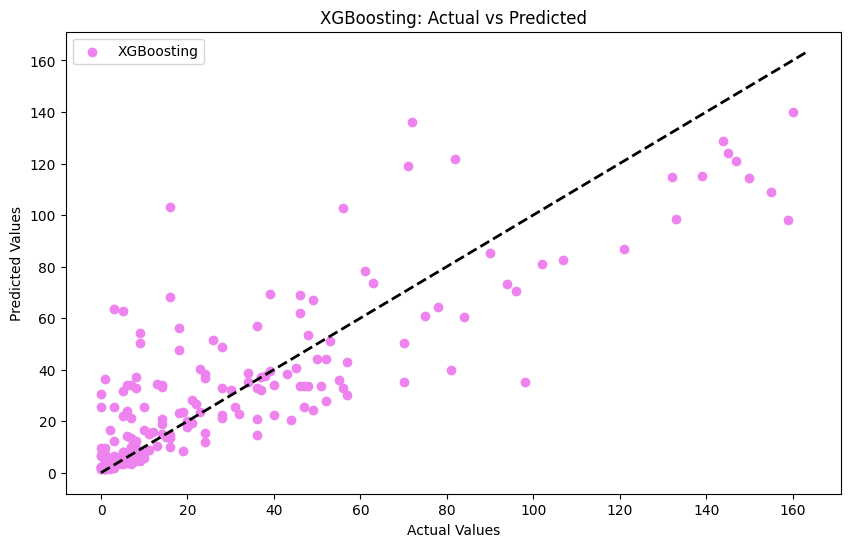

In [178]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gb, color='violet', label='XGBoosting')
plt.plot([y.min(),y.max()],[y.min(),y.max()],"k--",lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('XGBoosting: Actual vs Predicted')
plt.legend()
plt.show()

### ## Model Comparison plot

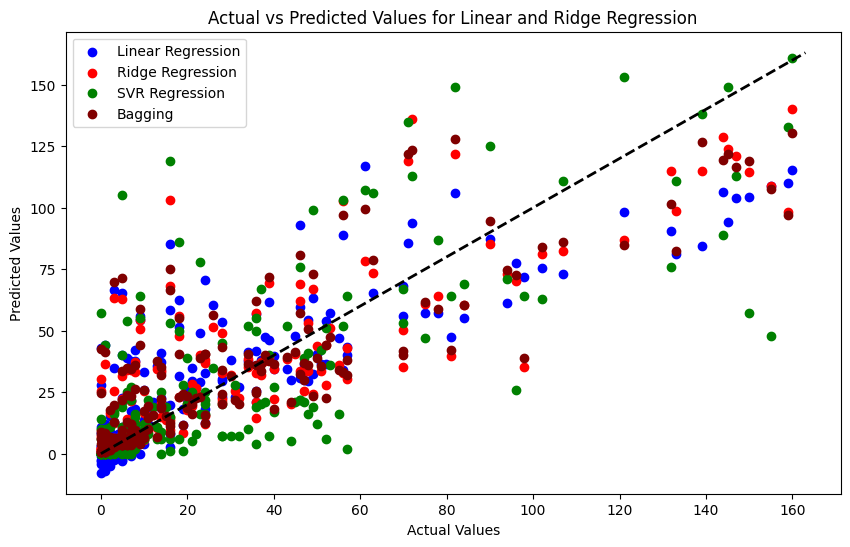

In [218]:
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred_lr, color='blue', label='Linear Regression')

# Plot for Ridge Regression
plt.scatter(y_test, y_pred_gb, color='red', label='Ridge Regression')
plt.scatter(y_test, y_pred_tr, color='green', label='SVR Regression')
plt.scatter(y_test, y_pred_xg, color='maroon', label='Bagging')

plt.plot([y.min(),y.max()],[y.min(),y.max()],"k--",lw=2)




plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Linear and Ridge Regression')
plt.legend()
plt.show()

### Handling Outliers

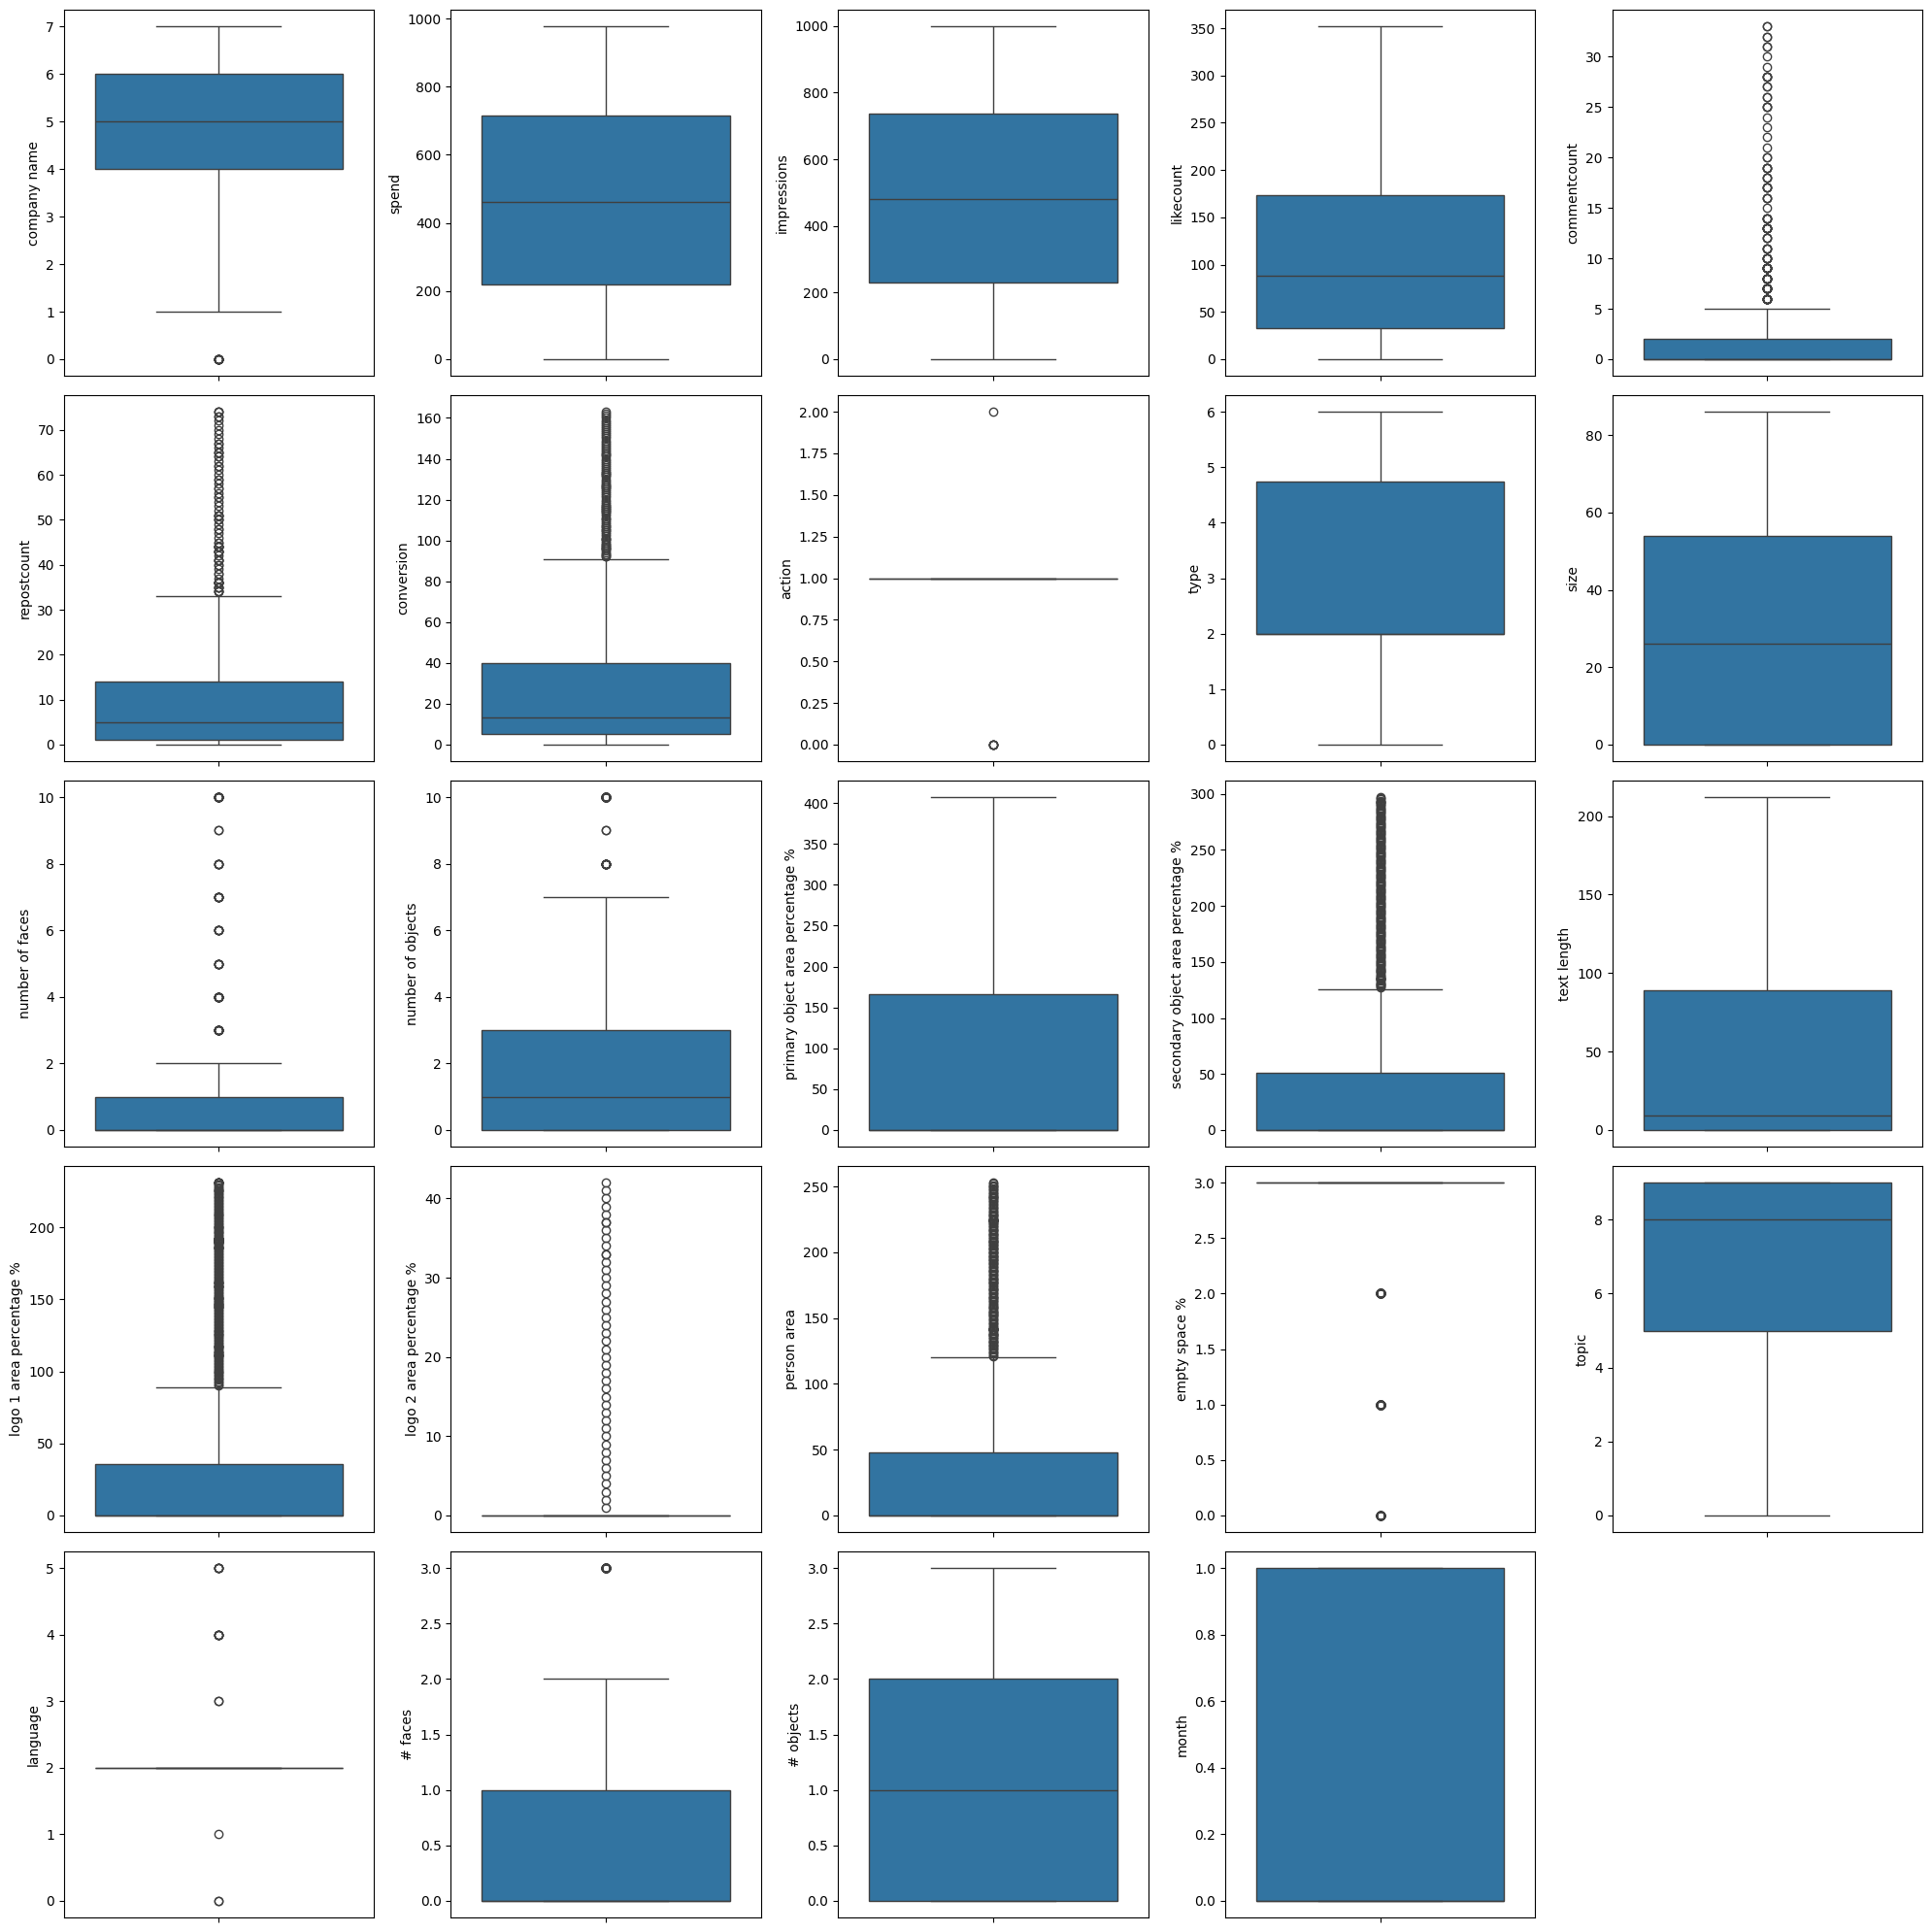

In [180]:
plt.figure(figsize=(20,20))
p=1
for i in df:
    if p<25:
        
        plt.subplot(5,5,p)
        sns.boxplot(df[i])
    p+=1
plt.tight_layout()

In [181]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3-Q1

min_value = Q1-1.5*IQR

max_value = Q3+1.5*IQR

outliers_count = ((df>max_value) | (df<min_value)).sum()

outliers_percentage = (outliers_count/len(df))*100

print('\n Sum of outliers:\n',outliers_count)
print('\n Percentage of outliers:\n',outliers_percentage)


 Sum of outliers:
 company name                           18
spend                                   0
impressions                             0
likecount                               0
commentcount                          128
repostcount                            85
conversion                             92
action                                  6
type                                    0
size                                    0
number of faces                        89
number of objects                      72
primary object area percentage %        0
secondary object area percentage %    178
text length                             0
logo 1 area percentage %              208
logo 2 area percentage %               44
person area                           175
empty space %                         174
topic                                   0
language                               16
# faces                                50
# objects                               0
month         

In [182]:
df['action'].unique()

array([1, 2, 0])

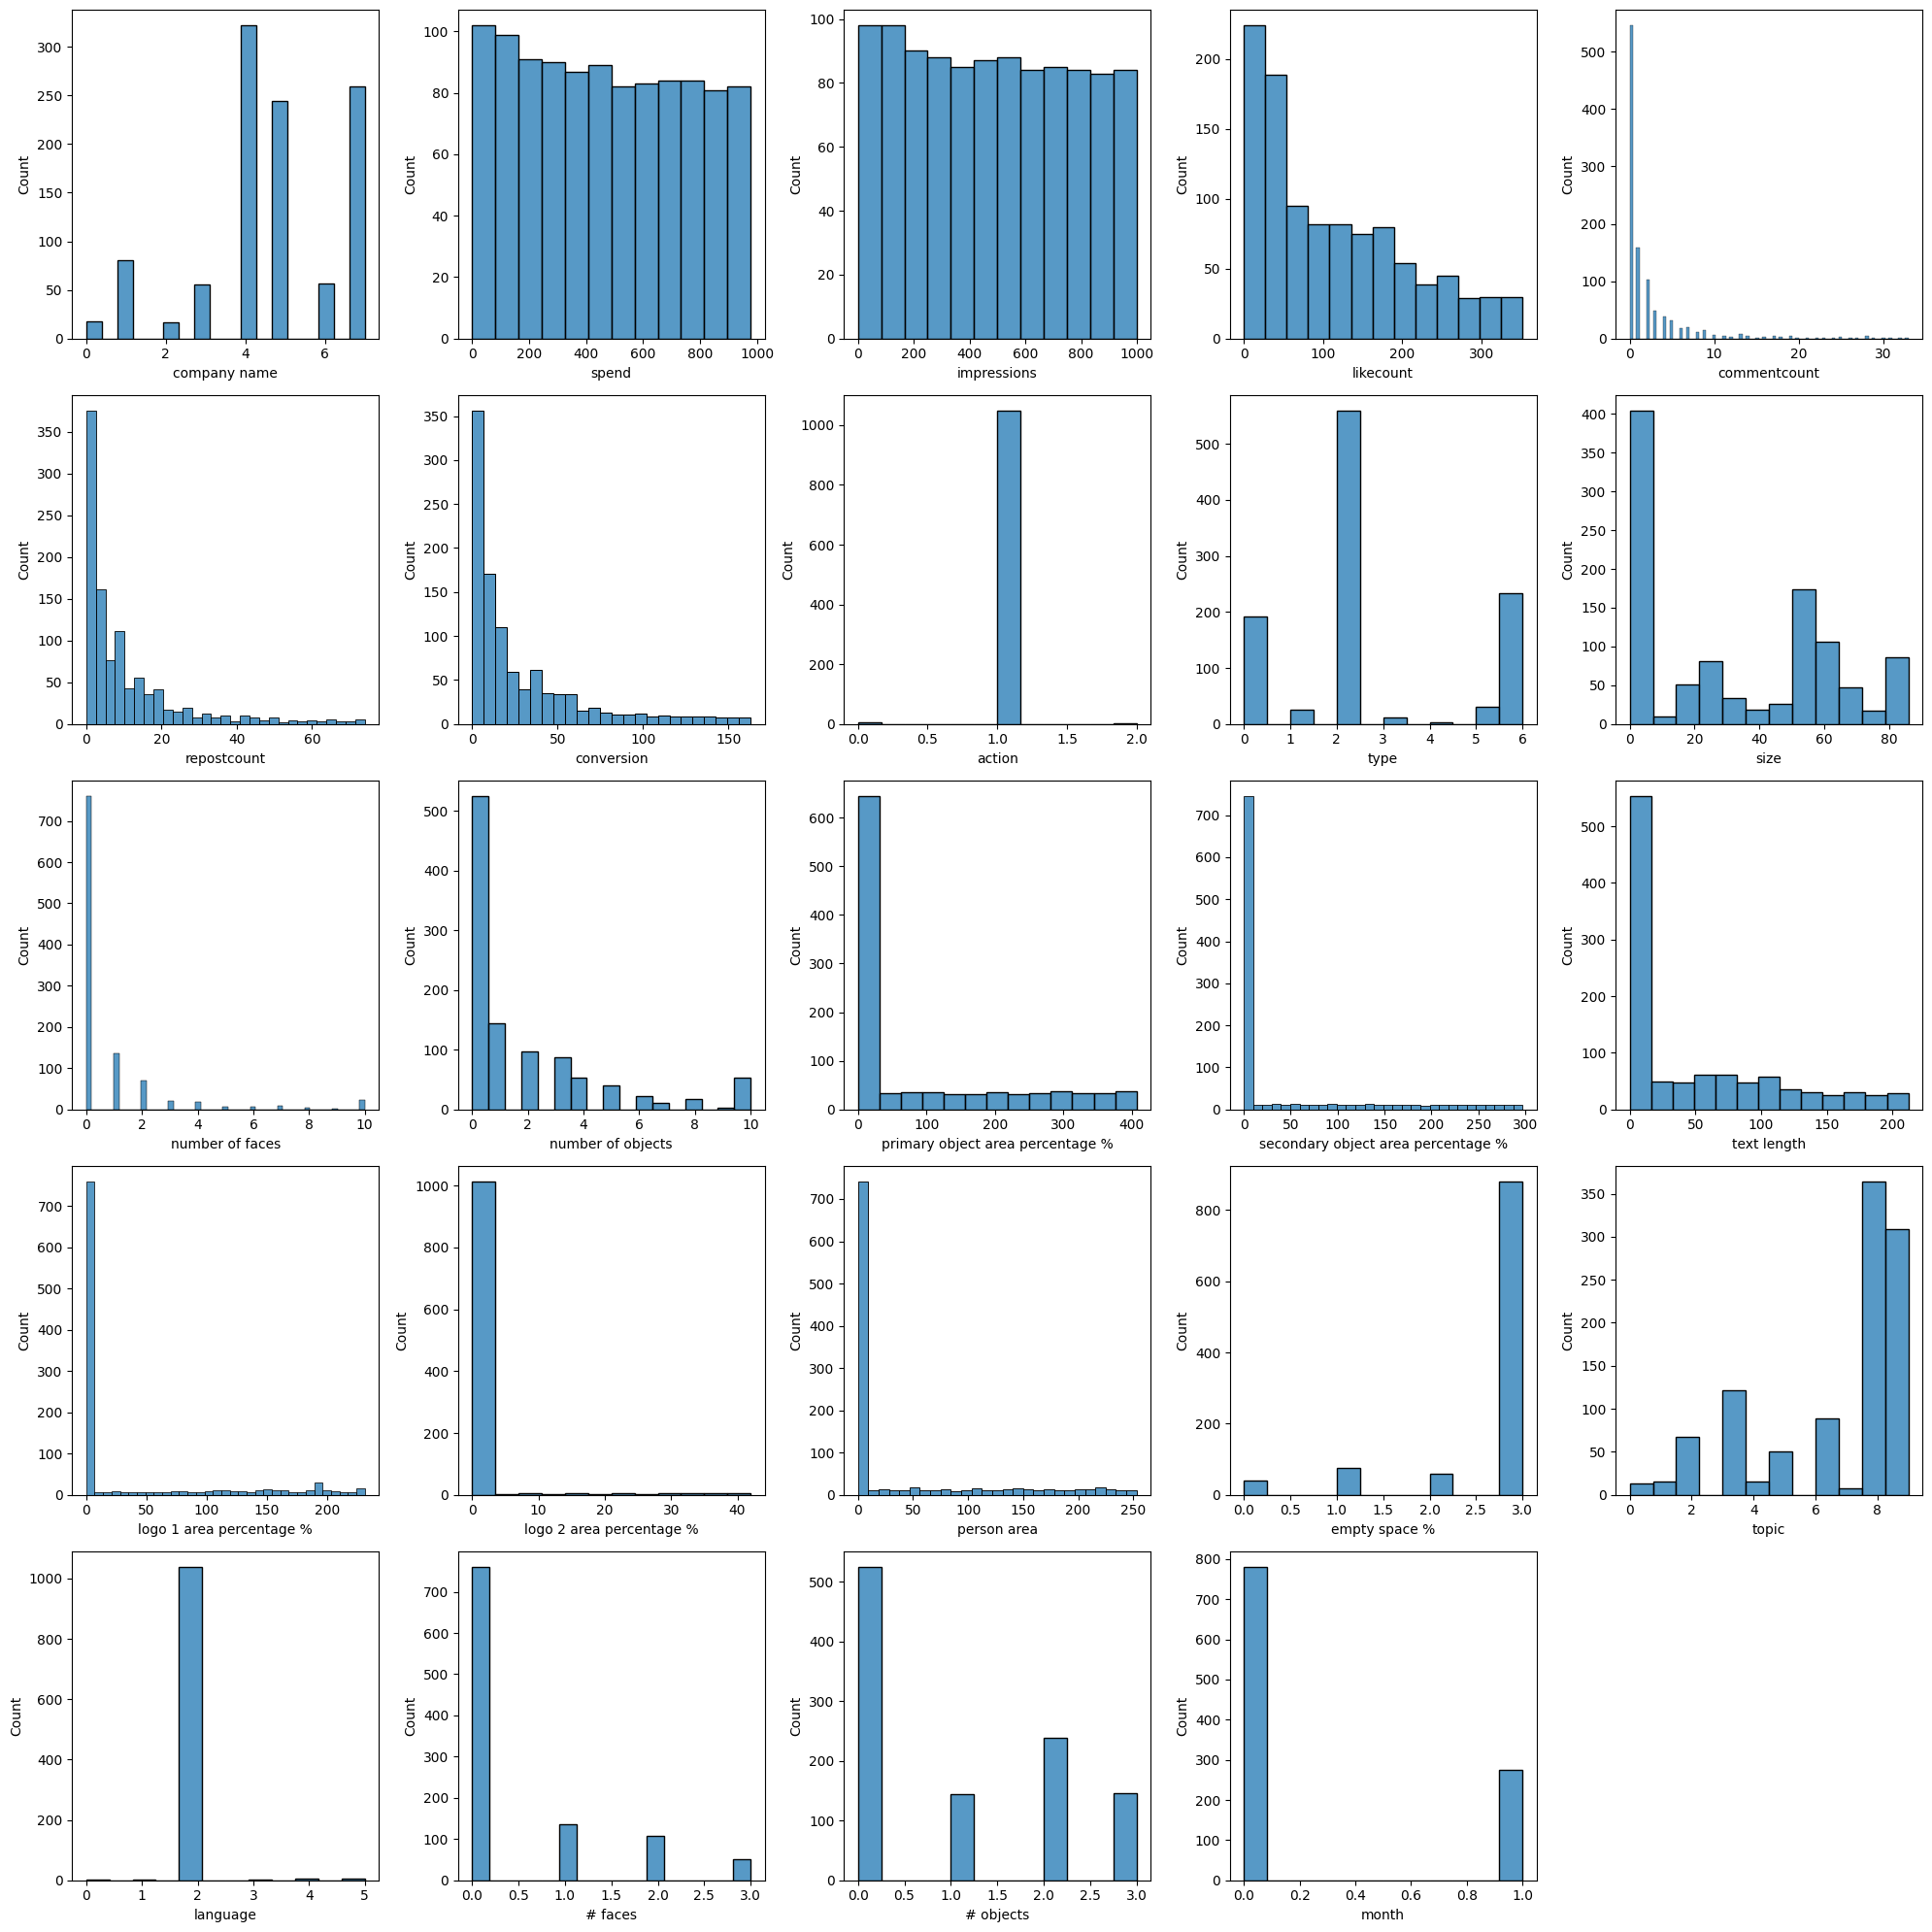

In [184]:
plt.figure(figsize=(20,20))
p=1
for i in df:
    if p<25:
        
        plt.subplot(5,5,p)
        sns.histplot(x=df[i])
    p+=1
plt.tight_layout()

In [185]:
df1

,company name,spend,impressions,likecount,commentcount,repostcount,conversion,action,type,size,number of faces,number of objects,primary object area percentage %,secondary object area percentage %,text length,logo 1 area percentage %,logo 2 area percentage %,person area,empty space %,topic,language,# faces,# objects,month,day,weekday
0,5,205,140,31,0,2,7,1,1,0,0,0,0,0,0,0,0,0,3,8,2,0,0,1,4,1
1,5,81,596,176,1,9,0,1,2,54,0,1,350,0,34,21,0,0,3,8,2,0,1,1,0,4
2,5,107,225,53,1,16,11,1,6,0,0,0,0,0,0,0,0,0,3,9,2,0,0,1,3,0
3,5,156,199,52,1,5,8,1,6,0,0,0,0,0,0,0,0,0,3,9,2,0,0,1,3,0
4,5,154,480,141,1,5,25,1,6,2,2,6,344,261,21,29,1,249,0,9,2,2,3,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,4,40,161,34,1,1,1,1,6,0,0,0,0,0,0,0,0,0,3,8,2,0,0,0,3,4
1050,4,83,50,12,0,0,3,1,2,61,0,3,0,0,23,0,0,0,3,8,4,0,2,0,7,1
1051,4,932,961,291,2,64,97,1,6,0,0,0,0,0,0,0,0,0,3,8,2,0,0,0,3,4
1052,4,366,270,32,0,1,2,1,2,69,2,8,0,0,0,0,0,250,3,9,2,2,3,0,7,1


In [188]:
df['action'].value_counts()

action
1    1048
0       5
2       1
Name: count, dtype: int64

In [189]:
df1.loc[(df['action']==0)|(df['action']==2)]

,company name,spend,impressions,likecount,commentcount,repostcount,conversion,action,type,size,number of faces,number of objects,primary object area percentage %,secondary object area percentage %,text length,logo 1 area percentage %,logo 2 area percentage %,person area,empty space %,topic,language,# faces,# objects,month,day,weekday
104,6,813,779,181,10,8,32,2,6,86,8,10,142,161,67,0,0,194,3,6,2,3,3,1,7,4
157,1,718,749,303,1,12,142,0,2,69,10,10,152,132,3,0,0,187,3,5,2,3,3,1,5,2
219,1,853,887,262,10,9,124,0,2,69,2,8,194,212,0,0,0,149,3,8,2,2,3,1,6,3
356,1,811,722,277,17,58,127,0,2,52,0,0,0,0,26,75,36,0,3,3,2,0,0,0,13,0
620,1,951,986,305,8,65,141,0,2,85,0,1,127,0,104,0,0,0,3,8,2,0,1,0,15,2
636,1,349,829,324,11,13,151,0,2,78,3,8,103,126,54,0,0,68,3,9,2,2,3,0,30,3


In [190]:
df1.loc[(df['action']==0)|(df['action']==2),'action']=1

In [192]:
df1['action'].value_counts()

action
1    1054
Name: count, dtype: int64

In [193]:
df1['logo 2 area percentage %'].value_counts()

logo 2 area percentage %
0     1010
33       2
37       2
22       1
36       1
5        1
24       1
29       1
8        1
27       1
40       1
28       1
32       1
2        1
9        1
16       1
41       1
42       1
21       1
31       1
30       1
25       1
34       1
11       1
1        1
6        1
15       1
3        1
10       1
12       1
26       1
17       1
14       1
19       1
13       1
20       1
39       1
18       1
4        1
7        1
35       1
38       1
23       1
Name: count, dtype: int64

In [196]:
df1.loc[(df['logo 2 area percentage %']!=0),'logo 2 area percentage %']=0

In [197]:
df1['language'].value_counts()

language
2    1038
4       6
5       5
3       2
0       2
1       1
Name: count, dtype: int64

In [198]:
df1.loc[(df['language']!=0),'language']=2

In [199]:
df1['# faces'].value_counts()

# faces
0    760
1    136
2    108
3     50
Name: count, dtype: int64

In [200]:
df1.loc[(df['# faces']==3),'# faces']=0

In [201]:
X=df1.drop('conversion',axis=1)
Y=df1.conversion

In [202]:
from sklearn.model_selection import train_test_split 
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [203]:
from xgboost import XGBRFRegressor
xgbo=XGBRFRegressor()
xgbo.fit(X_train,Y_train)

XGBRFRegressor(base_score=0.5, booster='gbtree', callbacks=None,
               colsample_bylevel=1, colsample_bytree=1,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
               importance_type=None, interaction_constraints='', max_bin=256,
               max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=0, num_parallel_tree=100,
               objective='reg:squarederror', predictor='auto', random_state=0,
               reg_alpha=0, sampling_method='uniform', scale_pos_weight=1, ...)

In [204]:
Y_pred_xg=xgbo.predict(X_test)

In [205]:
from sklearn.metrics import r2_score
r2_score(Y_test,Y_pred_xg)

0.7143230554994134

In [206]:
gb.fit(X_train,Y_train)

GradientBoostingRegressor()

In [207]:
Y_pred_gb=gb.predict(X_test)
r2_score(Y_test,Y_pred_gb)

0.7128289238453047

In [208]:
df2

,company name,spend,impressions,likecount,commentcount,repostcount,conversion,action,type,size,number of faces,number of objects,primary object area percentage %,secondary object area percentage %,text length,logo 1 area percentage %,logo 2 area percentage %,person area,empty space %,topic,language,# faces,# objects,month,day,weekday
0,5,205,140,31,0,2,7,1,1,0,0,0,0,0,0,0,0,0,3,8,2,0,0,1,4,1
1,5,81,596,176,1,9,0,1,2,54,0,1,350,0,34,21,0,0,3,8,2,0,1,1,0,4
2,5,107,225,53,1,16,11,1,6,0,0,0,0,0,0,0,0,0,3,9,2,0,0,1,3,0
3,5,156,199,52,1,5,8,1,6,0,0,0,0,0,0,0,0,0,3,9,2,0,0,1,3,0
4,5,154,480,141,1,5,25,1,6,2,2,6,344,261,21,29,1,249,0,9,2,2,3,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,4,40,161,34,1,1,1,1,6,0,0,0,0,0,0,0,0,0,3,8,2,0,0,0,3,4
1050,4,83,50,12,0,0,3,1,2,61,0,3,0,0,23,0,0,0,3,8,4,0,2,0,7,1
1051,4,932,961,291,2,64,97,1,6,0,0,0,0,0,0,0,0,0,3,8,2,0,0,0,3,4
1052,4,366,270,32,0,1,2,1,2,69,2,8,0,0,0,0,0,250,3,9,2,2,3,0,7,1


### Scaling

In [209]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [210]:
x_train_scaled = scaler.fit_transform(x_train)

# Transform the test data using the fitted scaler
x_test_scaled = scaler.transform(x_test)

In [211]:
xg.fit(x_train_scaled,y_train)

XGBRFRegressor(base_score=0.5, booster='gbtree', callbacks=None,
               colsample_bylevel=1, colsample_bytree=1,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
               importance_type=None, interaction_constraints='', max_bin=256,
               max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=0, num_parallel_tree=100,
               objective='reg:squarederror', predictor='auto', random_state=0,
               reg_alpha=0, sampling_method='uniform', scale_pos_weight=1, ...)

In [213]:
Y_pred_xgb_scale=xg.predict(x_test_scaled)
r2_score(y_test,Y_pred_xgb_scale)

0.7154906235504844

In [214]:
gb.fit(x_train_scaled,y_train)

GradientBoostingRegressor()

In [215]:
Y_pred_gb_scale=gb.predict(x_test_scaled)
r2_score(y_test,Y_pred_gb_scale)

0.7332493106596651

Insights
- By using scaling it's improved to 73% accuarcy

### Hyperparameter Tuning

In [219]:
gbr = GradientBoostingRegressor()

# Define the parameter grid
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}

# Set up the grid search with cross-validation
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model
grid_search.fit(x_train, y_train)



# Get the best parameters
best_params = grid_search.best_params_

In [220]:
print(f"Best parameters found: {best_params}")
best_gbr = GradientBoostingRegressor(**best_params)
best_gbr.fit(x_train, y_train)

# Make predictions on the test data
y_pred_gbrhyper = best_gbr.predict(x_test)
r2_score(y_test,y_pred_gbrhyper)

Best parameters found: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300, 'subsample': 0.8}


0.7251969827292034

In [222]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Set up the grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, verbose=1)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_model = xgb.XGBRegressor(objective='reg:squarederror', **best_params)
best_model.fit(x_train, y_train)

# Make predictions and evaluate the model
y_pred = best_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print("Best Hyperparameters:", best_params)
print("Test RMSE:", rmse)

Fitting 3 folds for each of 729 candidates, totalling 2187 fits
Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 300, 'subsample': 0.6}
Test RMSE: 19.19368047351086


In [223]:
r2_score(y_test,y_pred)

0.7228046410811859

### Boosting and gradient boosting perform well; using scaling improves accuracy by around 2%, and hyperparameter tuning further improves accuracy by 1%.




# Conclusion
* Based on the data analysis of the marketing campaign for ABB, focusing on metrics such as spend, impressions, like count, comment count, repost count, conversion, action type, ad size, number of faces, number of objects, primary and secondary object area percentages, text length, logo area percentages, person area, empty space percentage, topic, language, number of faces and objects, and temporal factors (month, day, weekday), it is evident that ads labeled as "ABB" and "GE" are the best performers in this dataset.
# Key Findings
* High Conversion Rates for ABB and GE:

* Both ABB and GE ads exhibit notably higher conversion rates compared to other ads, indicating their effectiveness in driving desired actions from the audience.
- Engagement Metrics:

* ABB and GE ads not only achieve high impressions but also convert these impressions into meaningful engagement (likes, comments, reposts) and ultimately into higher conversion rates.
- Content Characteristics:

* Visual Elements: The ads from ABB and GE often feature optimized visual characteristics, such as effective use of primary and secondary object areas, and a balanced number of faces and objects.
* Text and Logos: These ads tend to have concise, impactful text and well-placed logos, contributing to their higher engagement and conversion rates.

# Recommendations to Improve Conversion Rates Based on Like Count, Impressions, and Document Type
To improve conversion rates by focusing on like count, impressions, and document type, follow these targeted strategies:

1. Optimize Content for Engagement
High-Quality Visuals: Use high-quality images and videos that are visually appealing to attract more likes and impressions. Visual content is more likely to be shared, increasing your reach and engagement.
Compelling Headlines: Craft attention-grabbing headlines that entice users to click and engage with your content. The headline is often the first thing users see, so make it count.
2. Leverage Document Type
Interactive Content: Utilize document types that encourage interaction, such as infographics, slideshows, and videos. Interactive content tends to have higher engagement rates, leading to more likes and impressions.
Educational Materials: Share educational content like whitepapers, case studies, and how-to guides that provide value to your audience. Valuable content is more likely to be liked and shared, increasing its reach.
3. Boost Impressions with Strategic Posting
Optimal Posting Times: Post content during peak engagement times identified through data analysis. This ensures maximum visibility and increases the chances of getting more likes and impressions.
Consistent Posting Schedule: Maintain a consistent posting schedule to keep your audience engaged. Regularly posting high-quality content helps build and retain an active following.
4. Engage with Your Audience
Respond to Comments: Engage with users who comment on your posts. Prompt responses to comments can encourage more interaction and increase the visibility of your content.
Encourage Sharing: Include calls-to-action (CTAs) that encourage users to like, share, and comment on your content. Increased interaction can boost impressions and engagement.
5. Use Targeted Advertising
Promoted Posts: Use paid promotions to boost high-performing posts. Promoted posts can reach a larger audience, increasing impressions and the likelihood of getting more likes.
Targeted Ads: Utilize targeted advertising to reach specific demographics and interests. Tailored ads are more likely to resonate with the audience, resulting in higher engagement and conversions.
### By implementing these strategies, can enhance the effectiveness of its marketing campaigns, increase likes and impressions, and ultimately improve conversion rates. Focusing on optimizing content for engagement, leveraging document types, strategic posting, audience engagement, targeted advertising, and continuous analysis and adaptation will lead to better overall marketing performance.


